# Advanced exploratory data analysis for Primary dataset


loadign the dataset

In [14]:
pip install pyarrow


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
df_X = pd.read_csv('SurveyData.csv')


In [16]:

# Extract feature matrix X and show 5 random samples
df_X.sample(5)


the age:   Gender:    Area: Current educational level: marital status:  \
310    35-44      male   Najran                    diploma         married   
696    35-44      male     Hail          Bachelor's degree         married   
380    18-24  feminine  Al-Baha  High school or equivalent        bachelor   
686    13-17  feminine   Riyadh  High school or equivalent        bachelor   
362    18-24  feminine     City  High school or equivalent        bachelor   

     Employment status: Do you use social media applications?  \
310  Full time employee                                   Yes   
696  Full time employee                                   Yes   
380             student                                   Yes   
686             student                                   Yes   
362             student                                   Yes   

               What social media platforms do you use?  \
310                                           WhatsApp   
696  X (Twitter), Snapchat, Youtube, WhatsApp, Tele...   
380  Facebook, Instagram, X (Twitter), LinkedIn, Ti...   
686  Instagram, TikTok, Snapchat, Youtube, WhatsApp...   
362           Instagram, X (Twitter), TikTok, Snapchat   

    What app do you use the most?  \
310                      WhatsApp   
696                   X (Twitter)   
380                     Instagram   
686                        TikTok   
362                     Instagram   

    How many hours do you spend on social media platforms daily?  ...  \
310                                              6-May            ...   
696                                              6-May            ...   
380                                              2-Jan            ...   
686                                             10-Sep            ...   
362                                             10-Sep            ...   

    Do you feel that using social media has affected your ability to focus and accomplish daily tasks?  \
310                                          No, never                                                   
696                                         Yes, a lot                                                   
380                                         Yes, a lot                                                   
686                                         Yes, a lot                                                   
362                                             rarely                                                   

    Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?  \
310                                          No, never                                                                                                                    
696                                             rarely                                                                                                                    
380                                         Yes, a lot                                                                                                                    
686                                          sometimes                                                                                                                    
362                                          No, never                                                                                                                    

    Do you use social media right before going to sleep?  \
310                                          sometimes     
696                                        Yes, always     
380                                        Yes, always     
686                                        Yes, always     
362                                        Yes, always     

    Do you have difficulty sleeping because of thinking about what you saw on social media platforms?  \
310

## 1- Structure investigation

 general structure of the dataset, rows and columns :

In [17]:
df_X.shape

(851, 22)

Data types:

In [18]:

import pandas as pd
pd.value_counts(df_X.dtypes)

/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_95812/1137090395.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_X.dtypes)


object    22
Name: count, dtype: int64

### 1.1. Structure of non-numerical features

 let's take a closer look at the non-numerical entries.

In [19]:
df_X.select_dtypes(exclude="number").head()

the age:   Gender:   Area: Current educational level: marital status:  \
0    13-17  feminine  Riyadh  High school or equivalent        bachelor   
1    18-24      male  Riyadh          Bachelor's degree        bachelor   
2    18-24  feminine  Riyadh          Bachelor's degree        bachelor   
3    18-24  feminine  Riyadh  High school or equivalent        bachelor   
4    35-44  feminine  Riyadh          Bachelor's degree         married   

      Employment status: Do you use social media applications?  \
0                student                                   Yes   
1           Not employed                                   Yes   
2                student                                   Yes   
3                student                                   Yes   
4  Housewife, unemployed                                   Yes   

             What social media platforms do you use?  \
0  Instagram, X (Twitter), TikTok, Snapchat, Yout...   
1  Instagram, X (Twitter), LinkedIn, TikTok, Snap...   
2  Instagram, X (Twitter), LinkedIn, Snapchat, Yo...   
3  X (Twitter), TikTok, Snapchat, Youtube, WhatsA...   
4  Instagram, X (Twitter), Snapchat, WhatsApp, Lo...   

  What app do you use the most?  \
0                        TikTok   
1                   X (Twitter)   
2                      WhatsApp   
3                      WhatsApp   
4                      Snapchat   

  How many hours do you spend on social media platforms daily?  ...  \
0                                   12 hours or more            ...   
1                                              4-Mar            ...   
2                                             10-Sep            ...   
3                                              6-May            ...   
4                                              6-May            ...   

  Do you feel that using social media has affected your ability to focus and accomplish daily tasks?  \
0                                         Yes, a lot                                                   
1                                          sometimes                                                   
2                                         Yes, a lot                                                   
3                                          sometimes                                                   
4                                         Yes, a lot                                                   

  Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?  \
0                                         Yes, a lot                                                                                                                    
1                                             rarely                                                                                                                    
2                                         Yes, a lot                                                                                                                    
3                                          No, never                                                                                                                    
4                                          sometimes                                                                                                                    

  Do you use social media right before going to sleep?  \
0                                        Yes, always     
1                                          sometimes     
2                                        Yes, always     
3                                          sometimes     
4                                        Yes, always     

  Do you have difficulty sleeping because of thinking about what you saw on social media platforms?  \
0                                          No, never                                   

In [20]:
df_X.describe(exclude="number")

the age:   Gender:   Area: Current educational level: marital status:  \
count       851       851     851                        851             851   
unique        6         2      20                          7               4   
top       18-24  feminine  Riyadh          Bachelor's degree        bachelor   
freq        384       606     448                        446             501   

       Employment status: Do you use social media applications?  \
count                 851                                   851   
unique                 17                                     2   
top               student                                   Yes   
freq                  395                                   839   

                  What social media platforms do you use?  \
count                                                 851   
unique                                                246   
top     Instagram, X (Twitter), TikTok, Snapchat, Yout...   
freq                                                   62   

       What app do you use the most?  \
count                            851   
unique                            15   
top                         WhatsApp   
freq                             235   

       How many hours do you spend on social media platforms daily?  ...  \
count                                                 851            ...   
unique                                                  8            ...   
top                                                 4-Mar            ...   
freq                                                  263            ...   

       Do you feel that using social media has affected your ability to focus and accomplish daily tasks?  \
count                                                 851                                                   
unique                                                  5                                                   
top                                            Yes, a lot                                                   
freq                                                  378                                                   

       Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?  \
count                                                 851                                                                                                                    
unique                                                  5                                                                                                                    
top                                            Yes, a lot                                                                                                                    
freq                                                  335                                                                                                                    

       Do you use social media right before going to sleep?  \
count                                                 851     
unique                                                  5     
top                                           Yes, always     
freq                                                  537     

       Do you have difficulty sleeping because of thinking about what you saw on social media platforms?  \
count                                                 851                                                  
unique                                                  5                                                  
top                                             No, never                                                  
freq                                                  322                                                  

       Does the number of likes or comments you get on your posts affect you?  \
count                      

### 1.2. Structure of numerical features

Next, let's take a closer look at the numerical features 

In [21]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


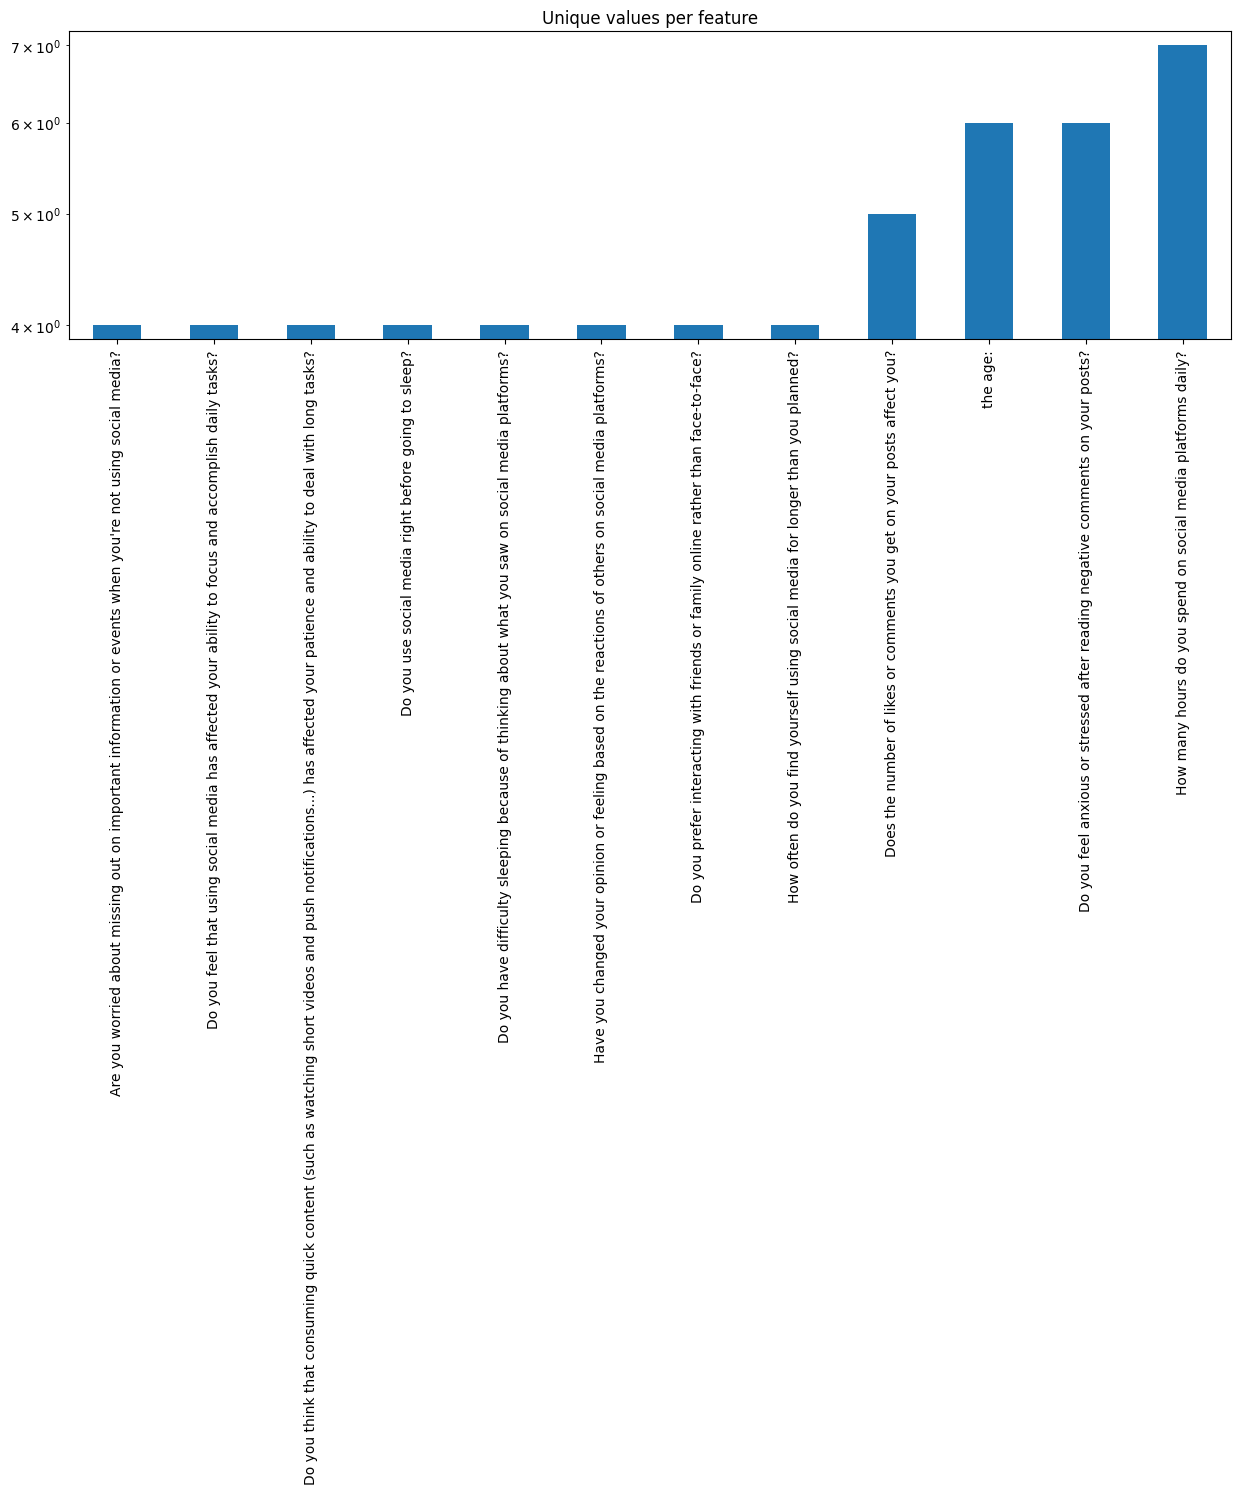

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DonePrimary.csv dataset
file_path = 'DonePrimary.csv'  # Provide the correct file path if needed
df_X = pd.read_csv(file_path)

# Compute the number of unique entries for each numerical feature
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot the information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

# Show the plot
plt.show()



### 1.3. Conclusion of structure investigation

At the end of this first investigation, we now have a clearer understanding of the general structure of our dataset. Here's a summary of the insights gathered:

Key Findings:
Number of Samples (Objects): 851

Number of Features (Attributes): 22

Data Types of Features:

object    22



## 2. Quality Investigation

Before diving into the specific content of the features, let's first assess the overall quality of the dataset. The aim is to get a comprehensive view of the dataset, focusing on aspects such as duplicates, missing values, unwanted entries, and potential recording errors.

### 2.1. Duplicates

In [23]:
pip install missingno


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 462 kB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Check the number of duplicates while ignoring the index feature
num_duplicates = df_X.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

# Drop duplicates based on all columns except the index
df_X = df_X.drop_duplicates().reset_index(drop=True)

Number of duplicates: 0


Yay no Duplicates!

### 2.2. Missing values

One significant quality issue to examine is the presence of missing values. While a certain amount of missing data is expected, we aim to identify substantial gaps in the dataset. This includes samples or features with a high proportion of missing values.

#### 2.2.1 Per Sample

Now, checking how much data is missing in each Column of your dataset. This helps identify coulumn with lots of missing values, which could impact our analysis.

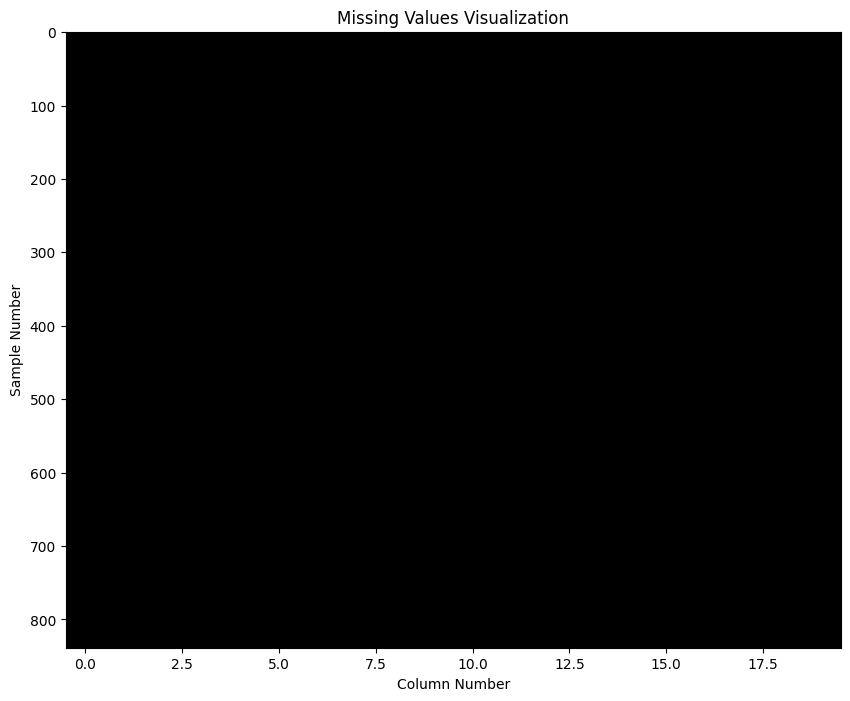

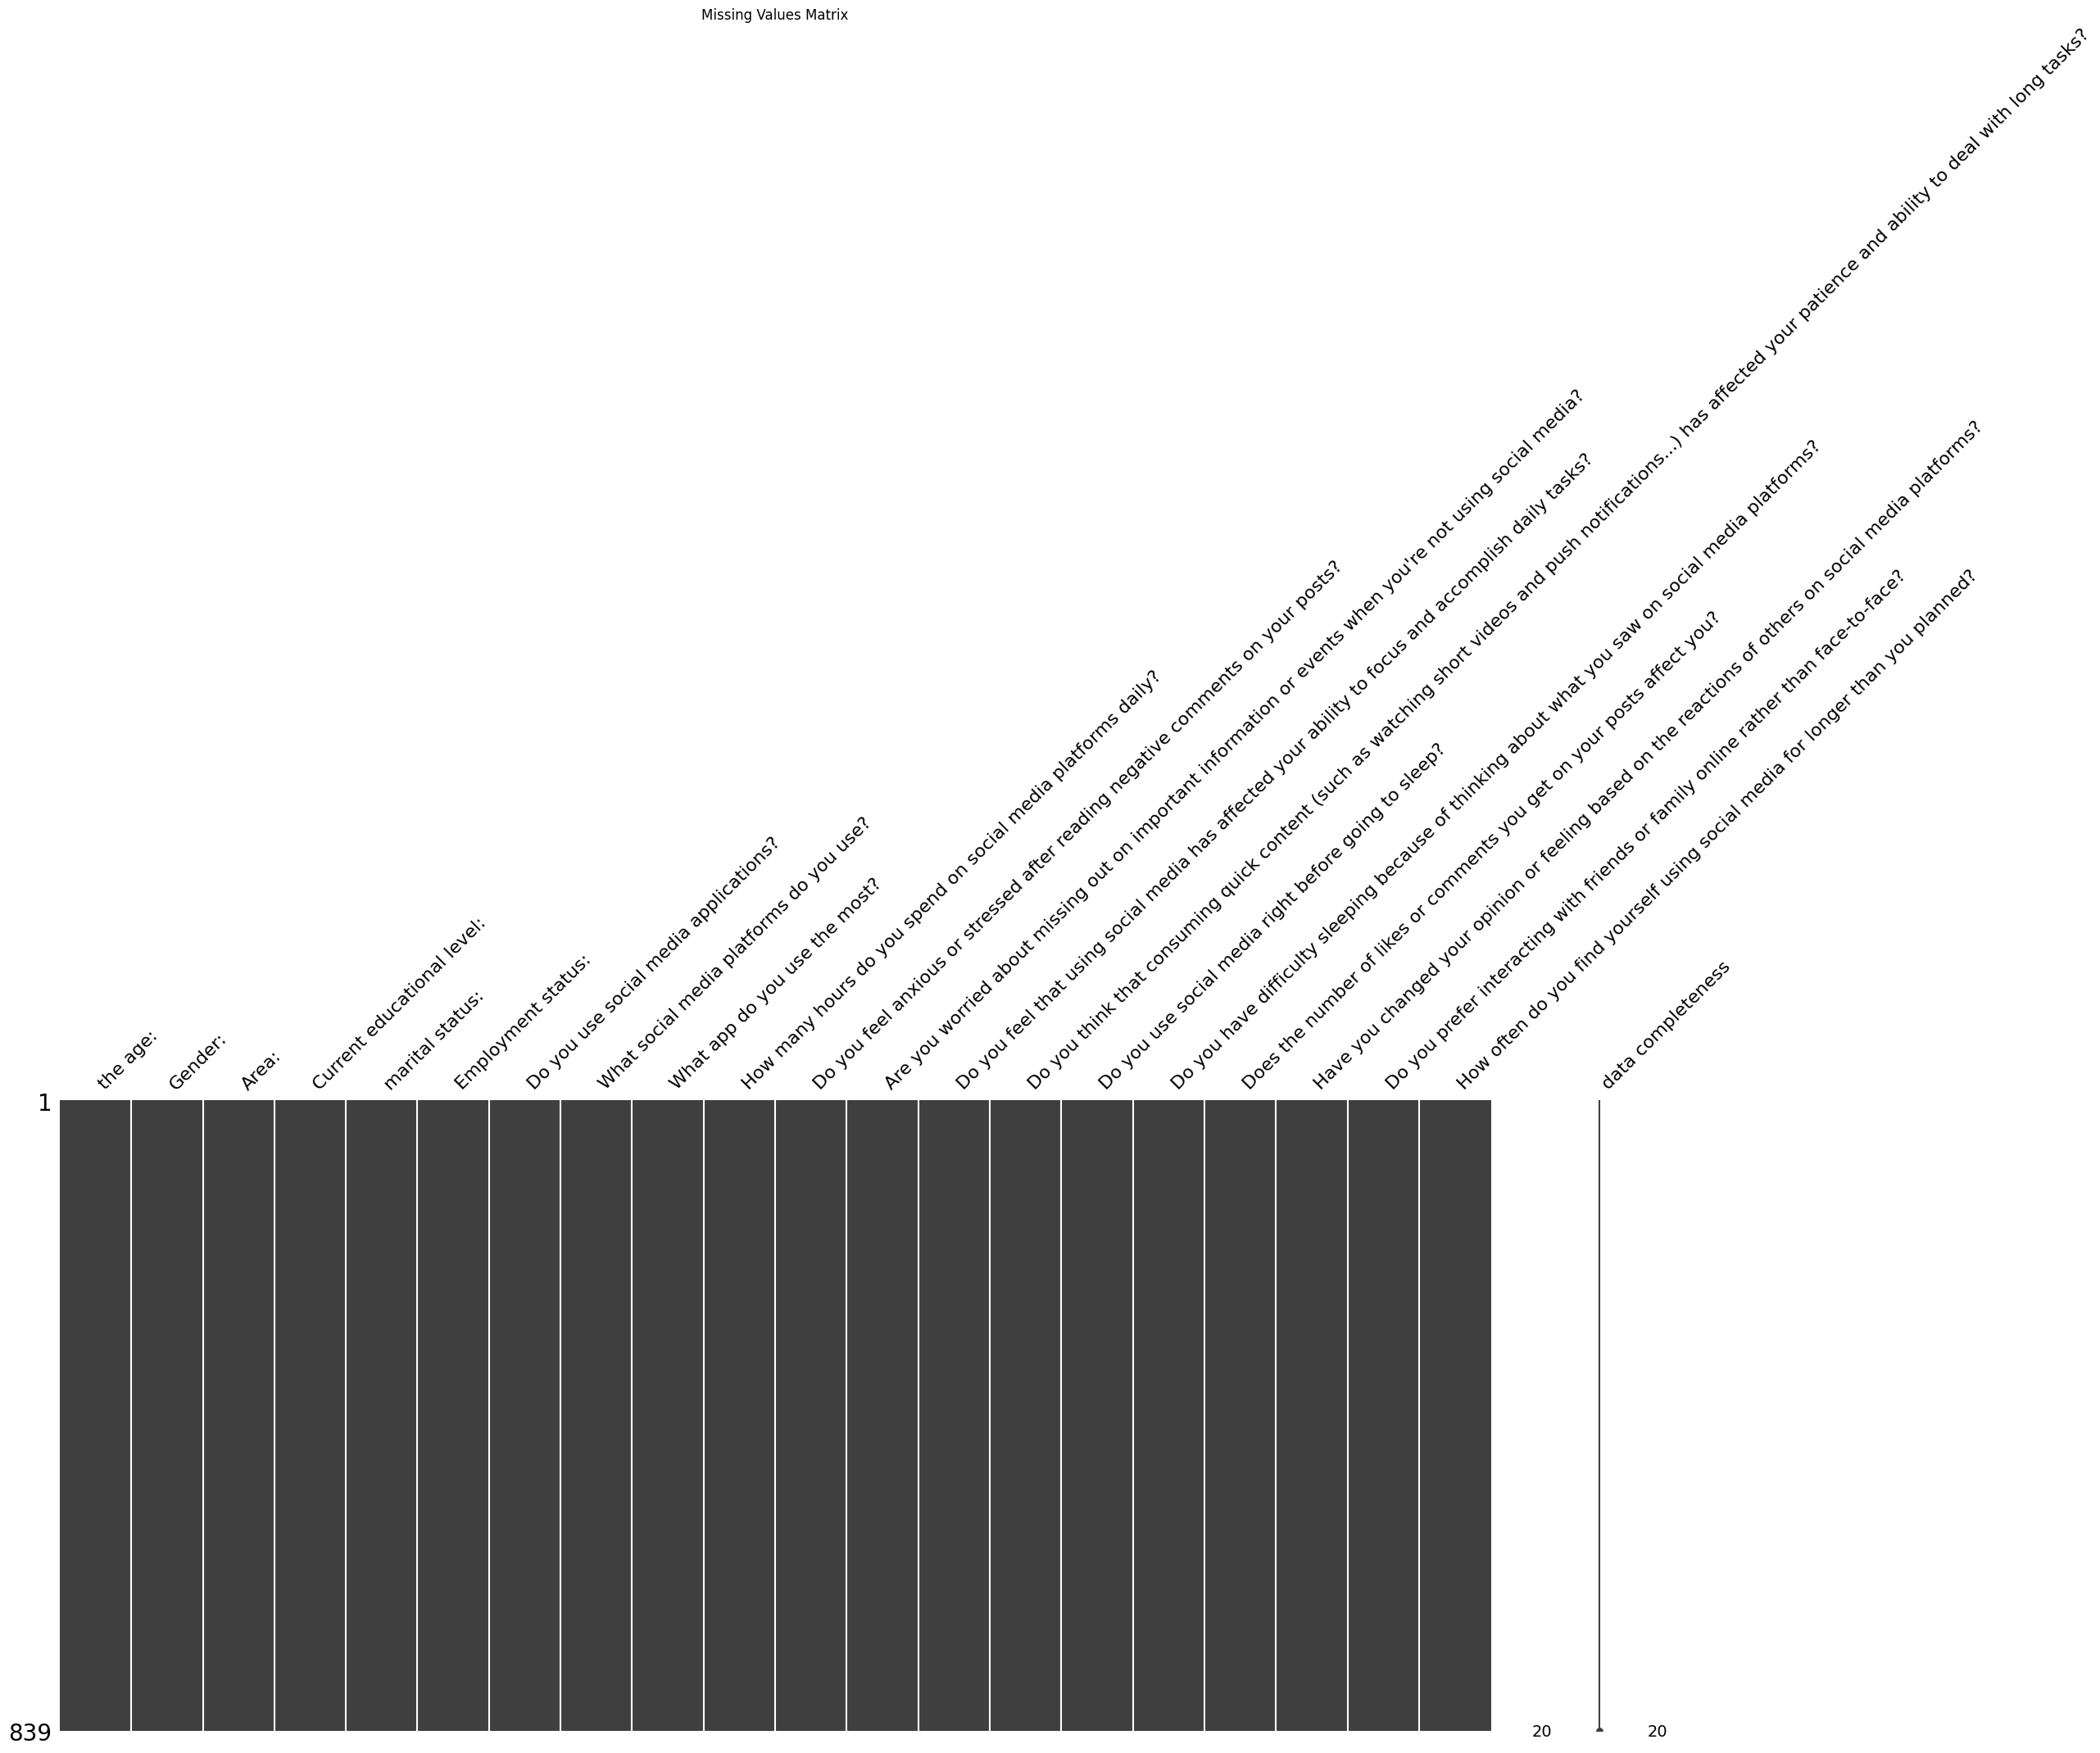

In [35]:

# 2.1. Per Sample
# a. Visualize missing values using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("Missing Values Visualization")
plt.show()

# b. Visualize missing values using missingno
msno.matrix(df_X, labels=True, sort="descending")
plt.title("Missing Values Matrix")
plt.show()

the two figures shows that there are no missing values in each coulmn

### 2.2.2. Per Feature

checking how much data is missing in each row of your dataset. This helps identify rows with lots of missing values, which could impact your analysis.

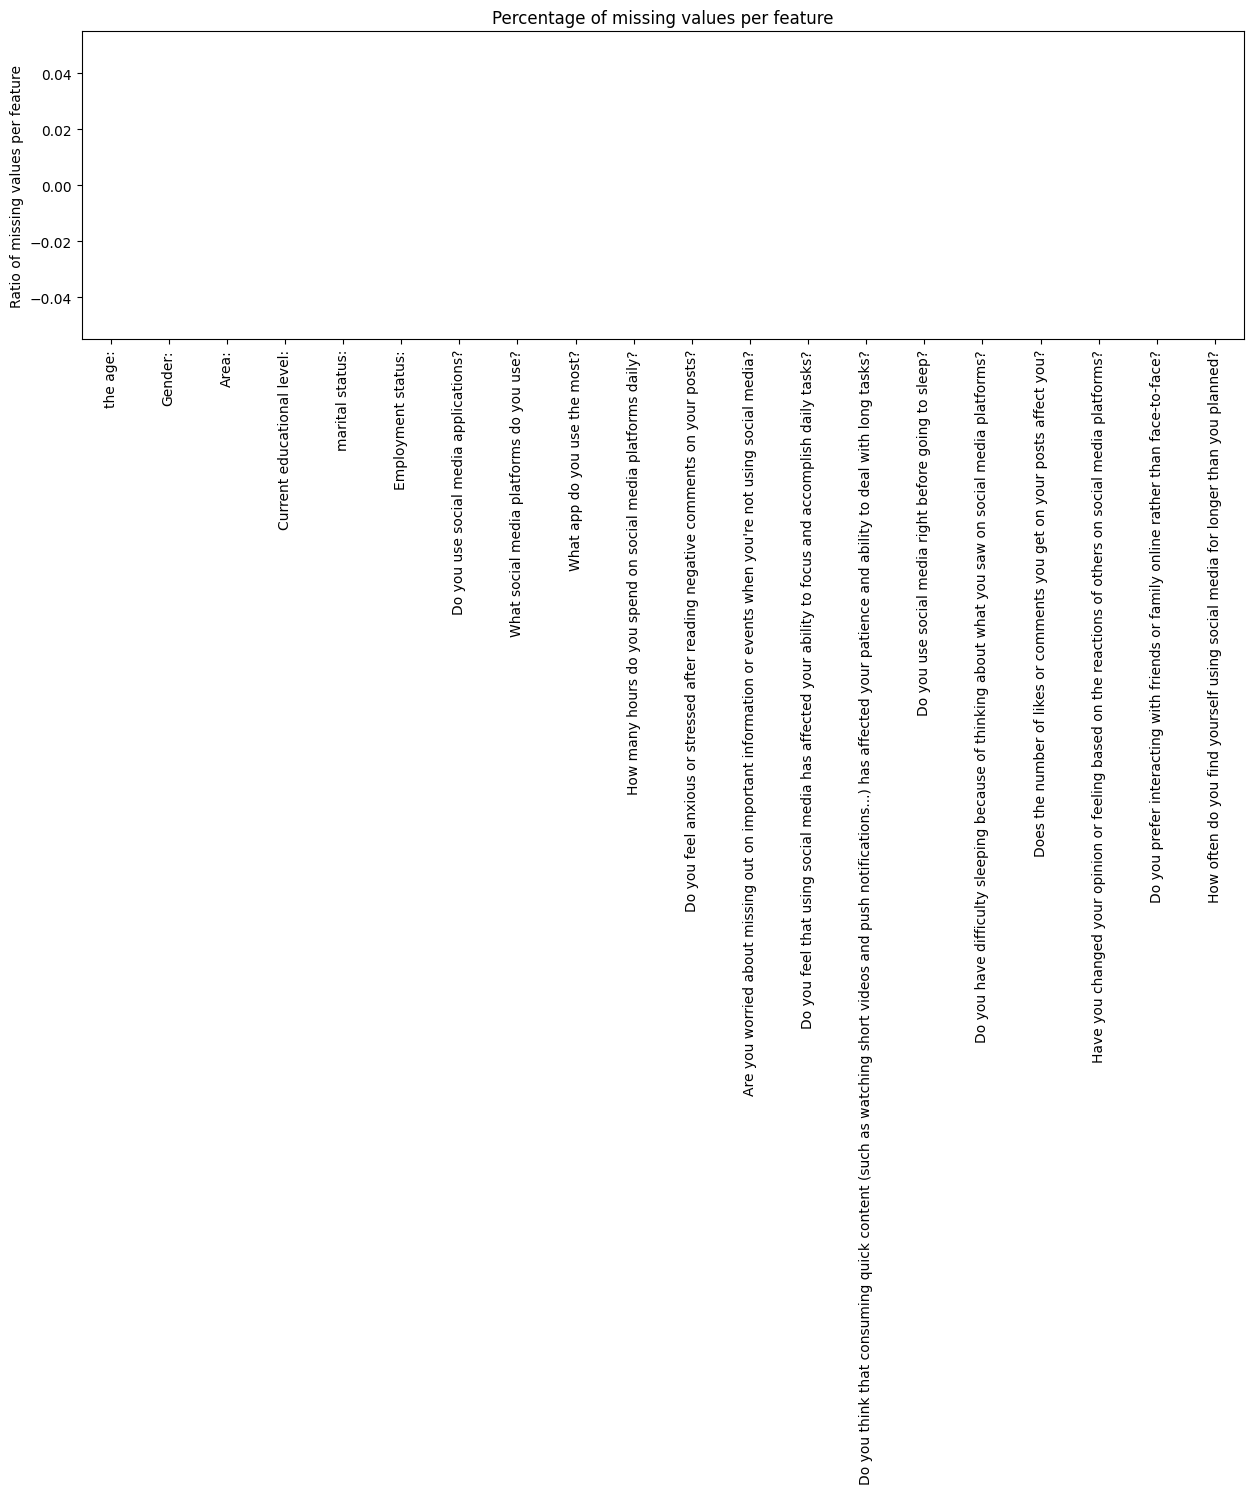

In [36]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

again, we have no missing vlaues in any row.

## 2.3. Unwanted entries and recording errors

Unwanted entries or recording errors can be a source of quality issues in a dataset and are different from outliers. While outliers are unusual data points within a distribution, unwanted entries shouldn't be there at all.

### 2.3.1. Numerical features

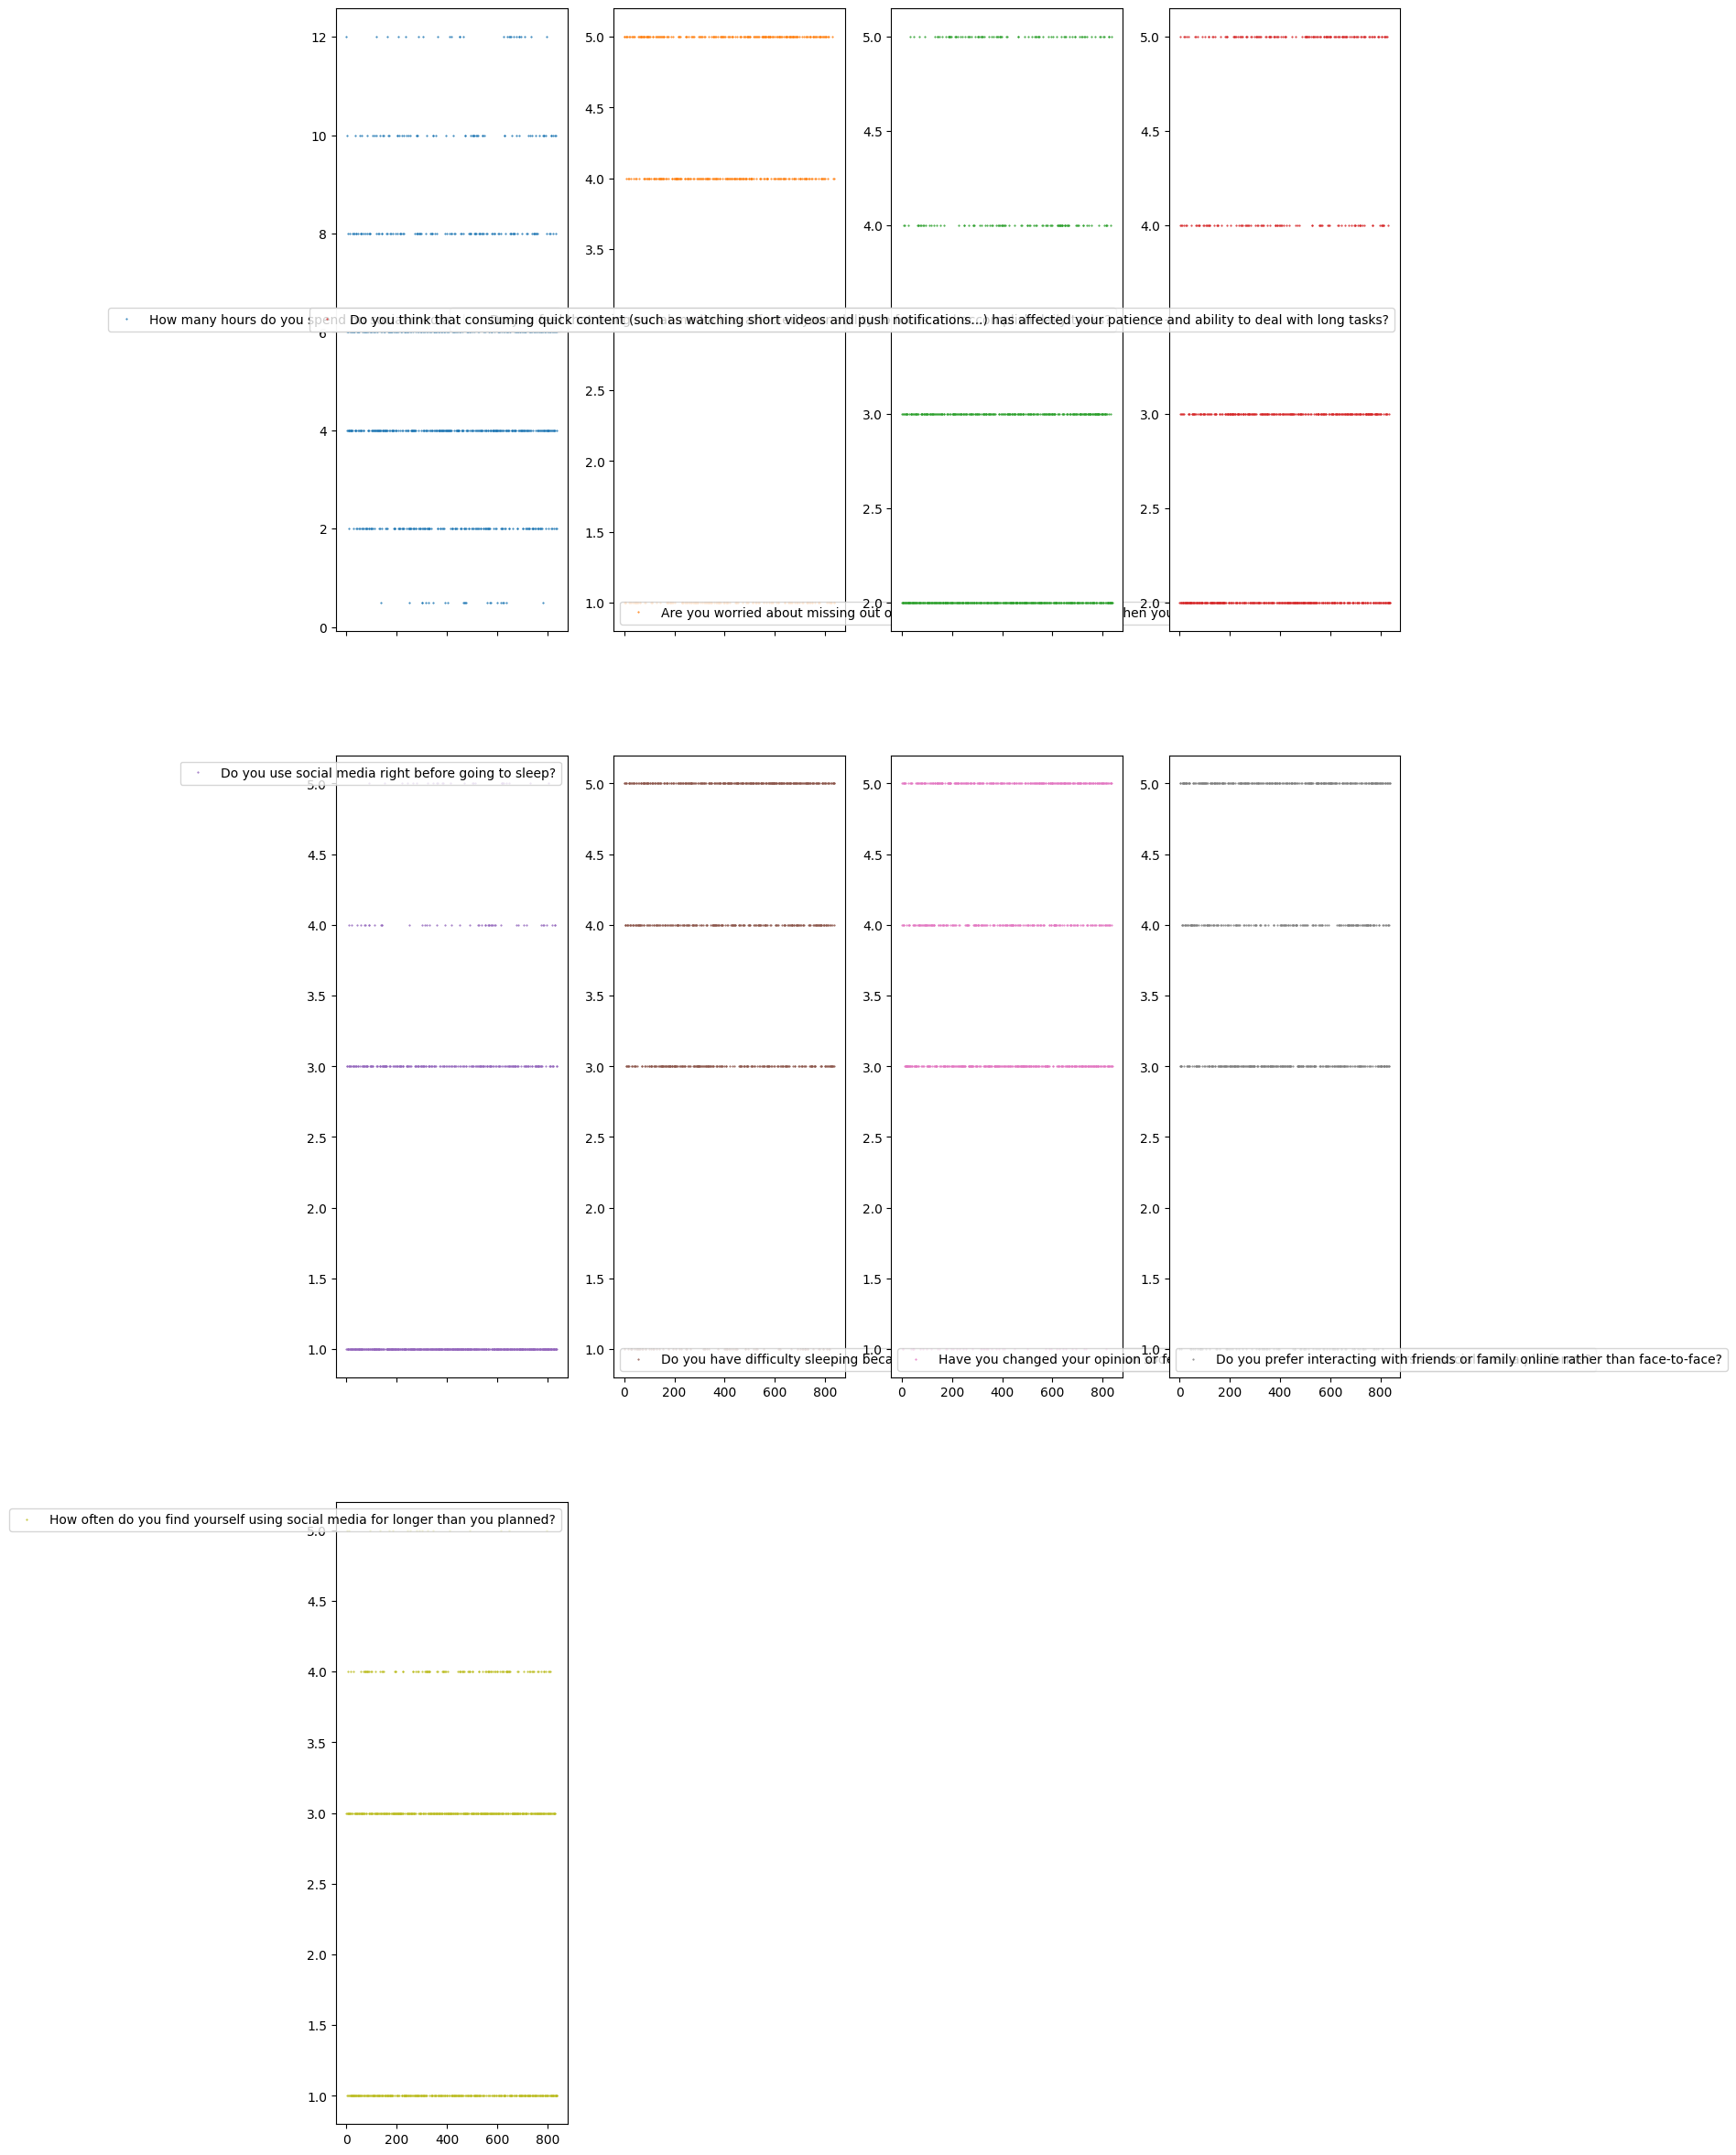

In [37]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index

### 2.3.2. Non-numerical features

Now, when we look for missing values in non-numerical features, we are checking for gaps in categorical or text-based columns, which might require special handling (like encoding or imputing) to fill or remove.

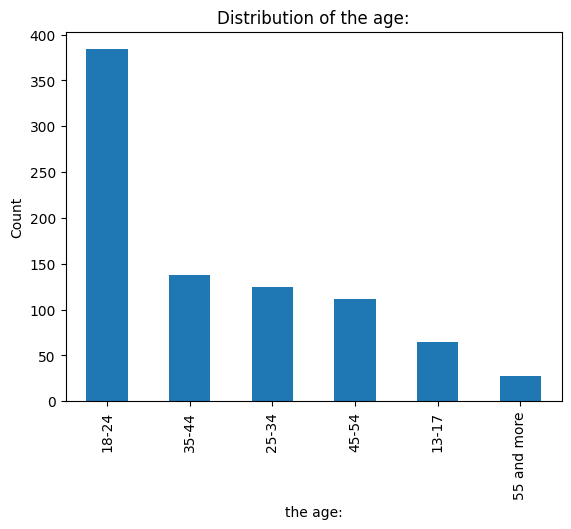

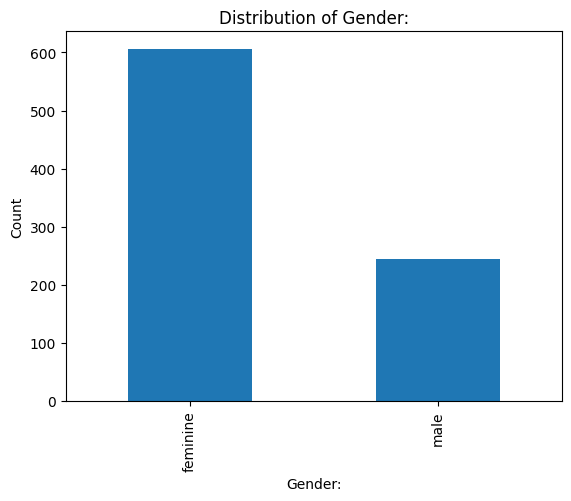

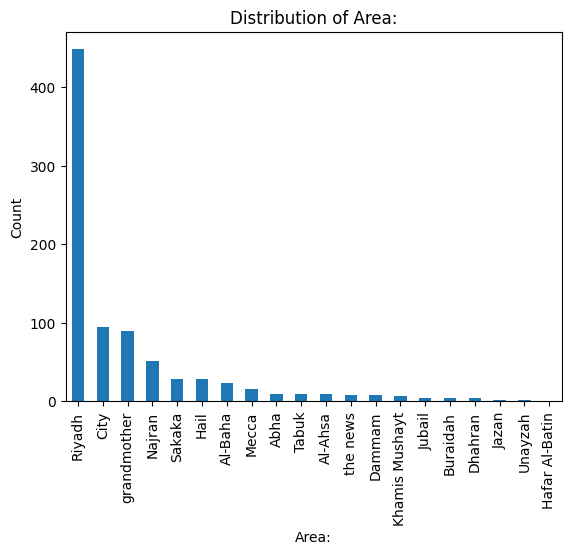

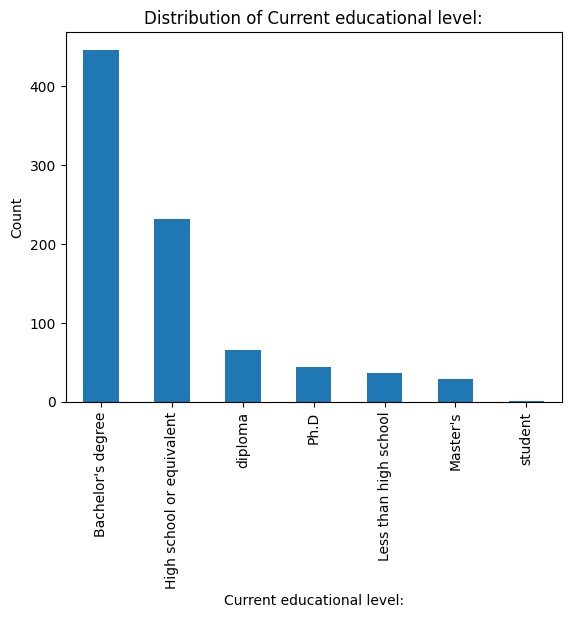

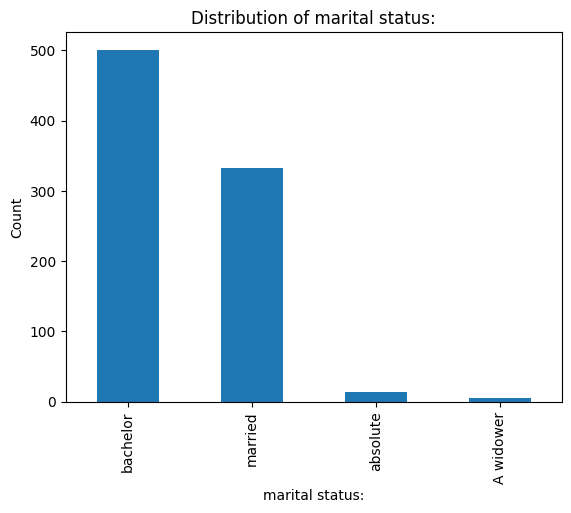

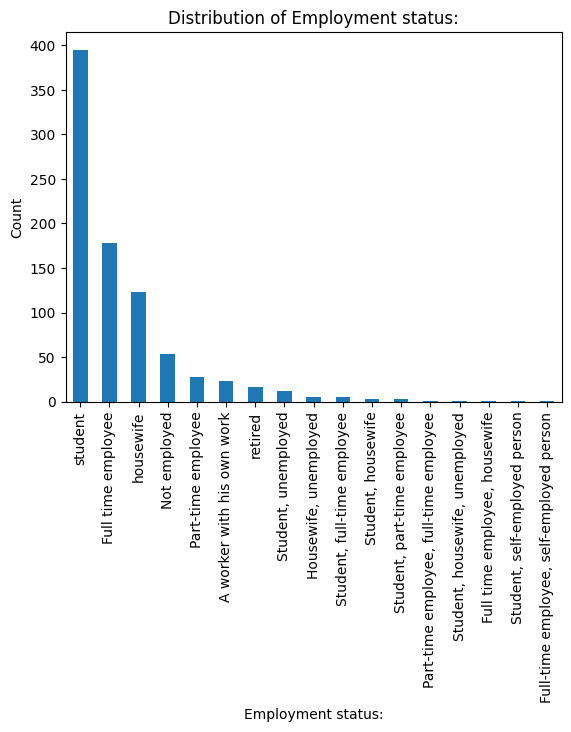

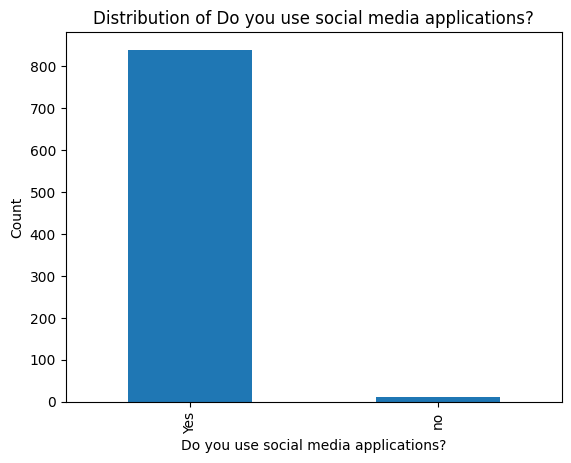

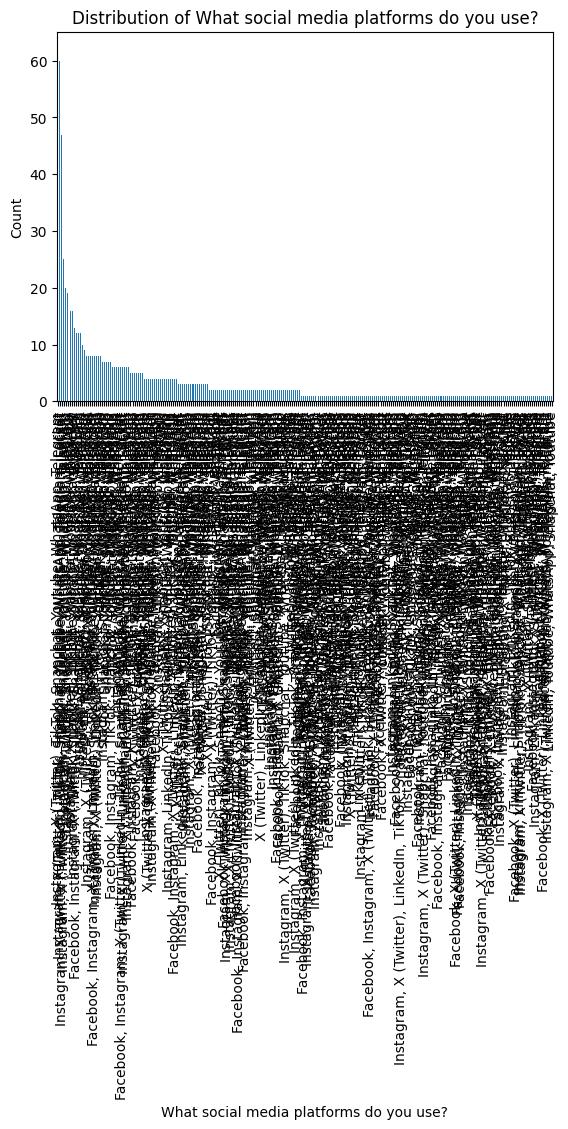

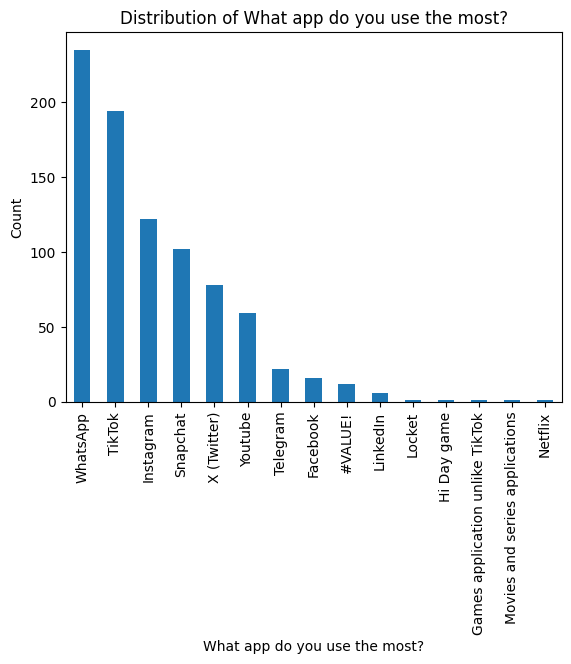

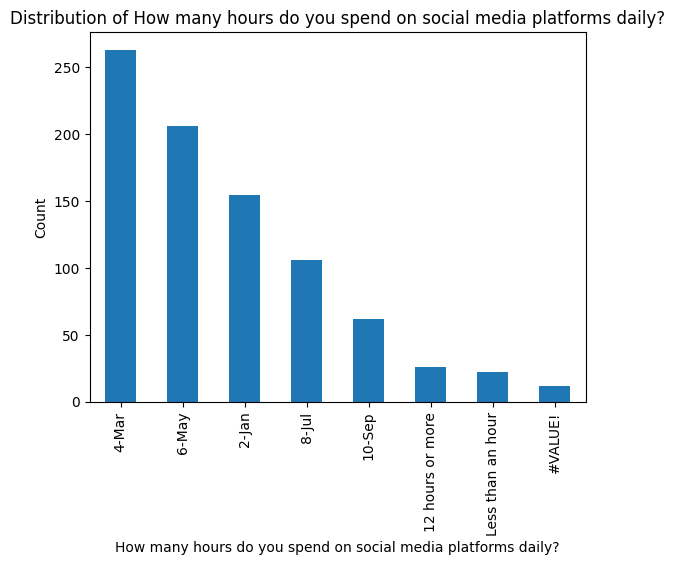

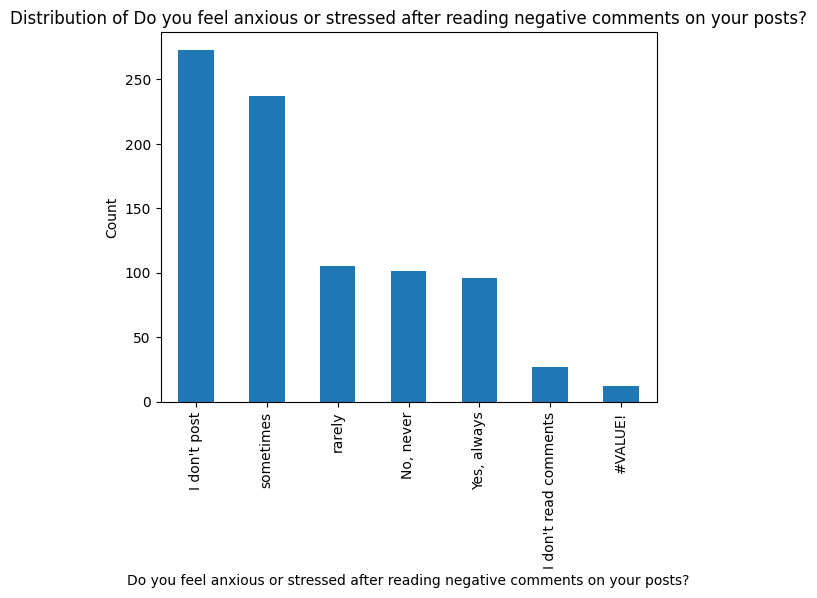

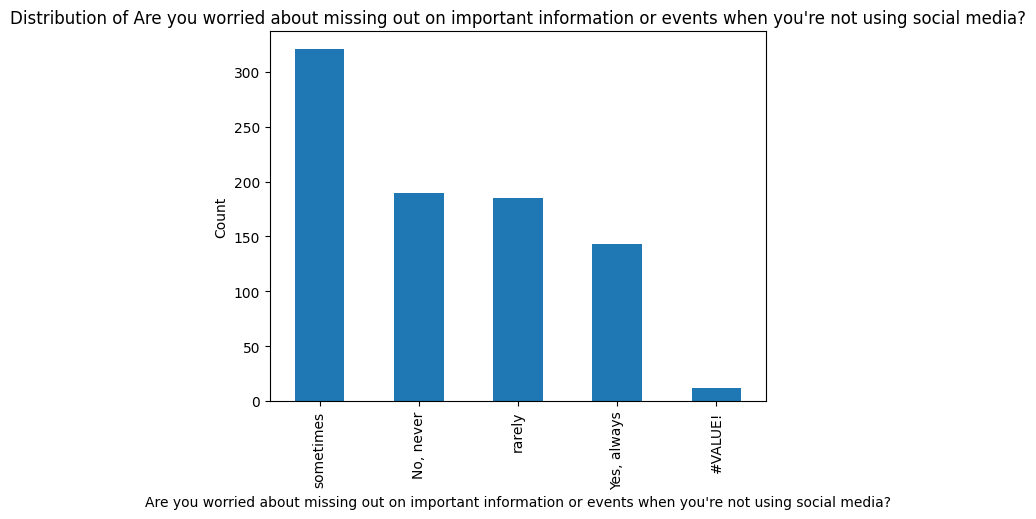

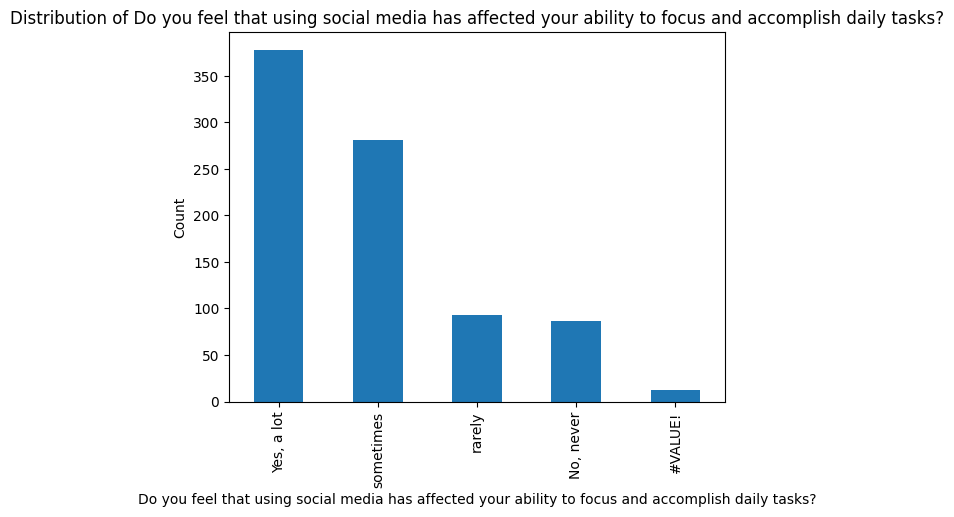

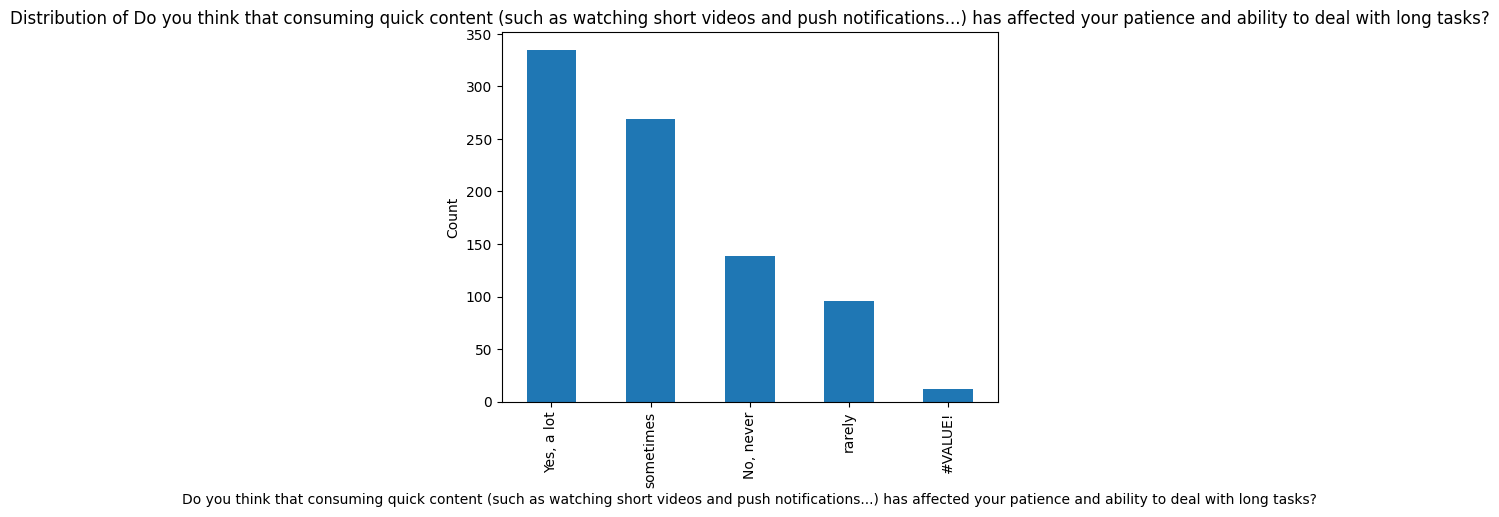

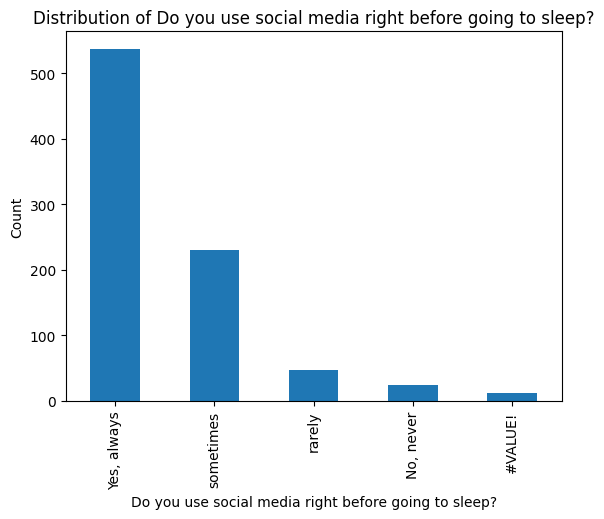

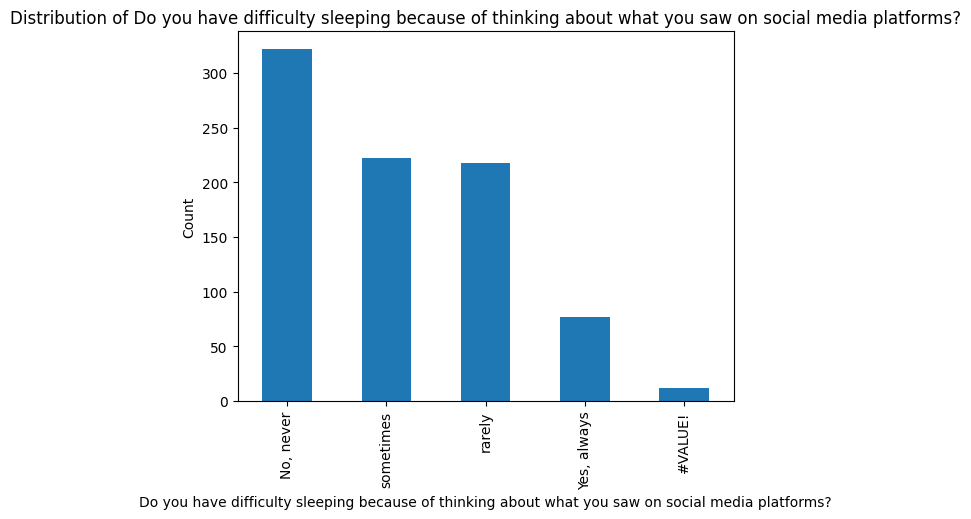

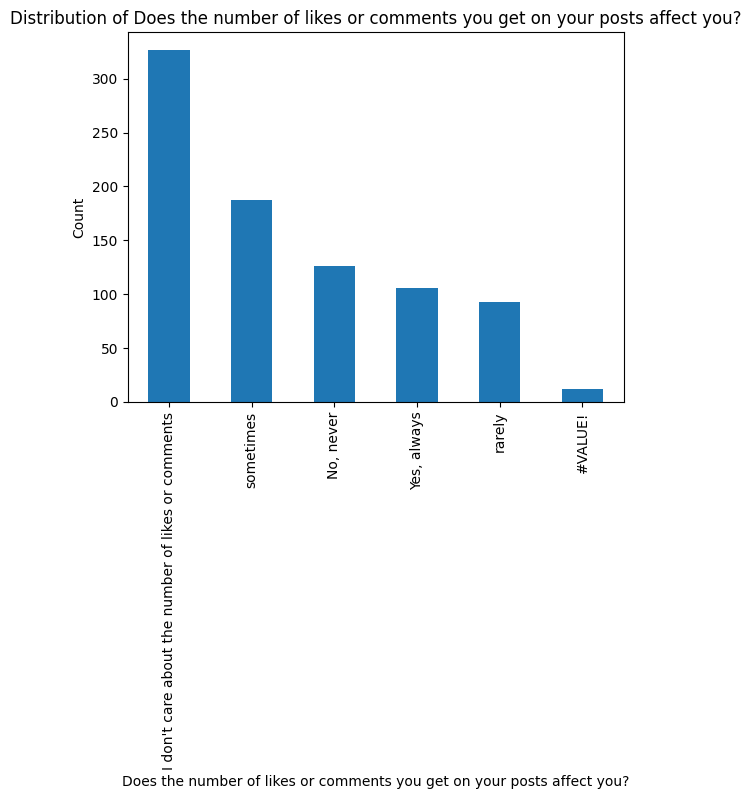

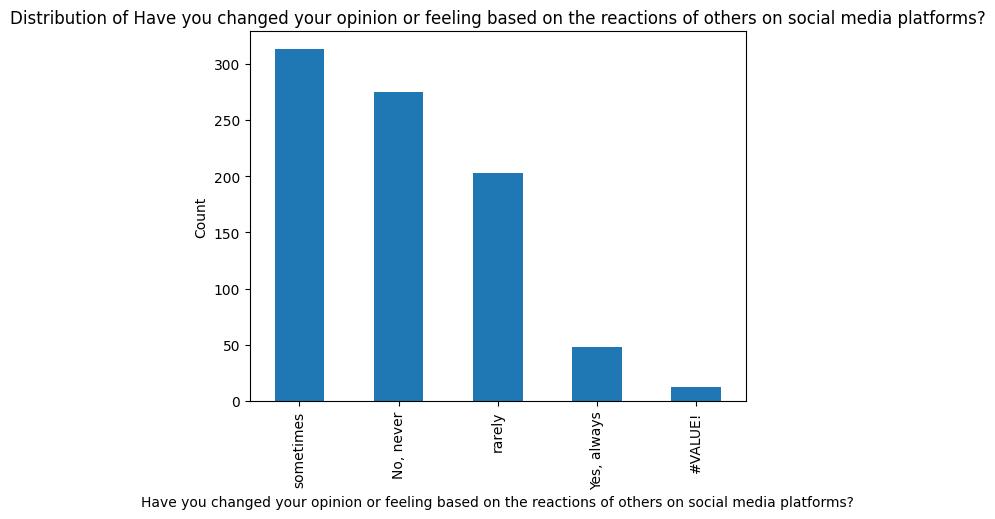

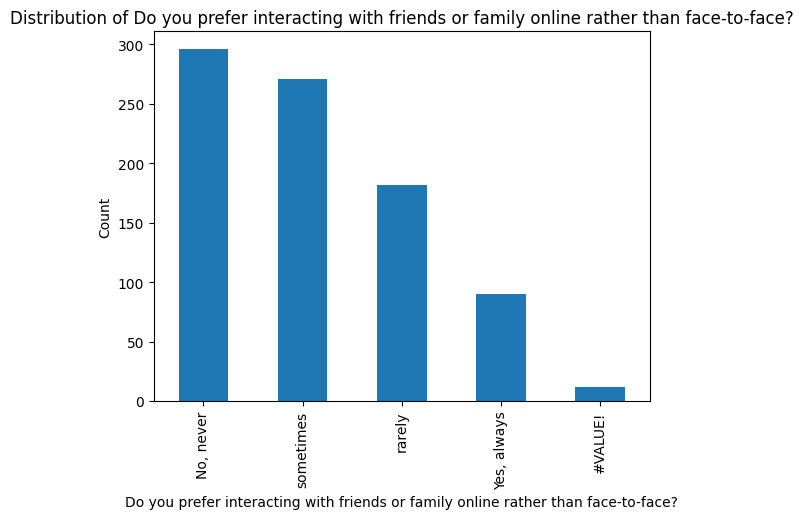

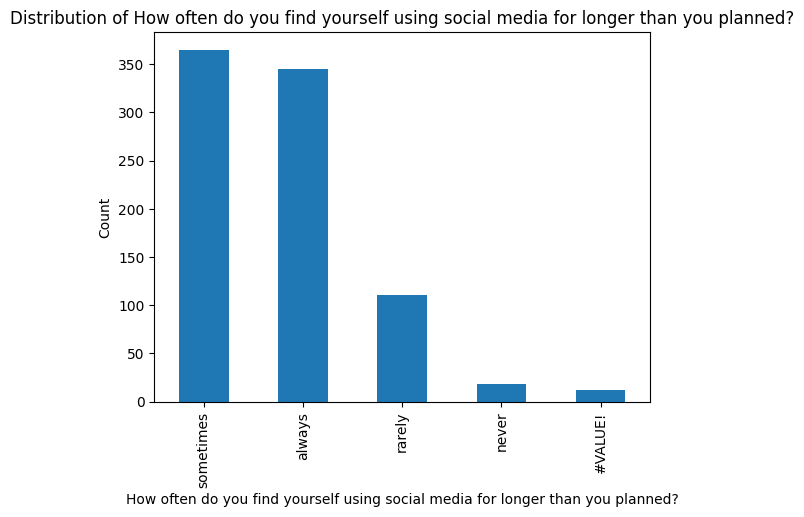

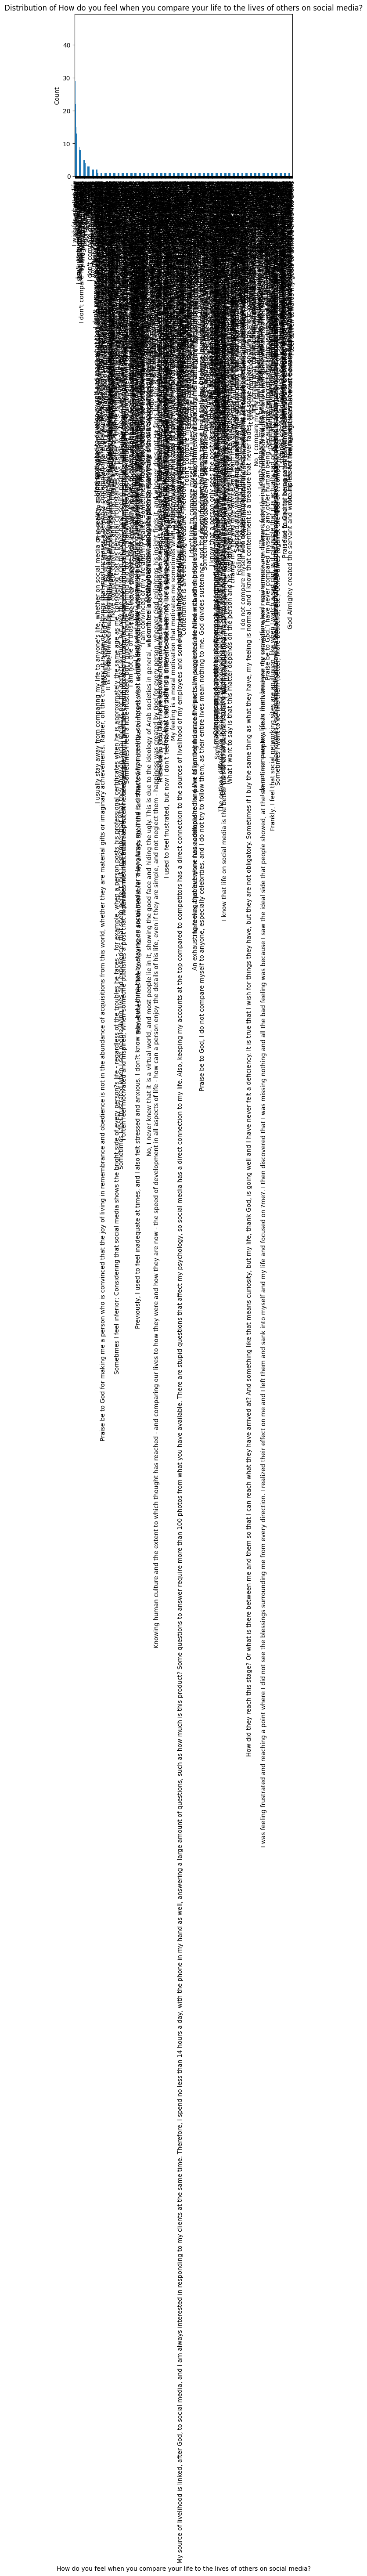

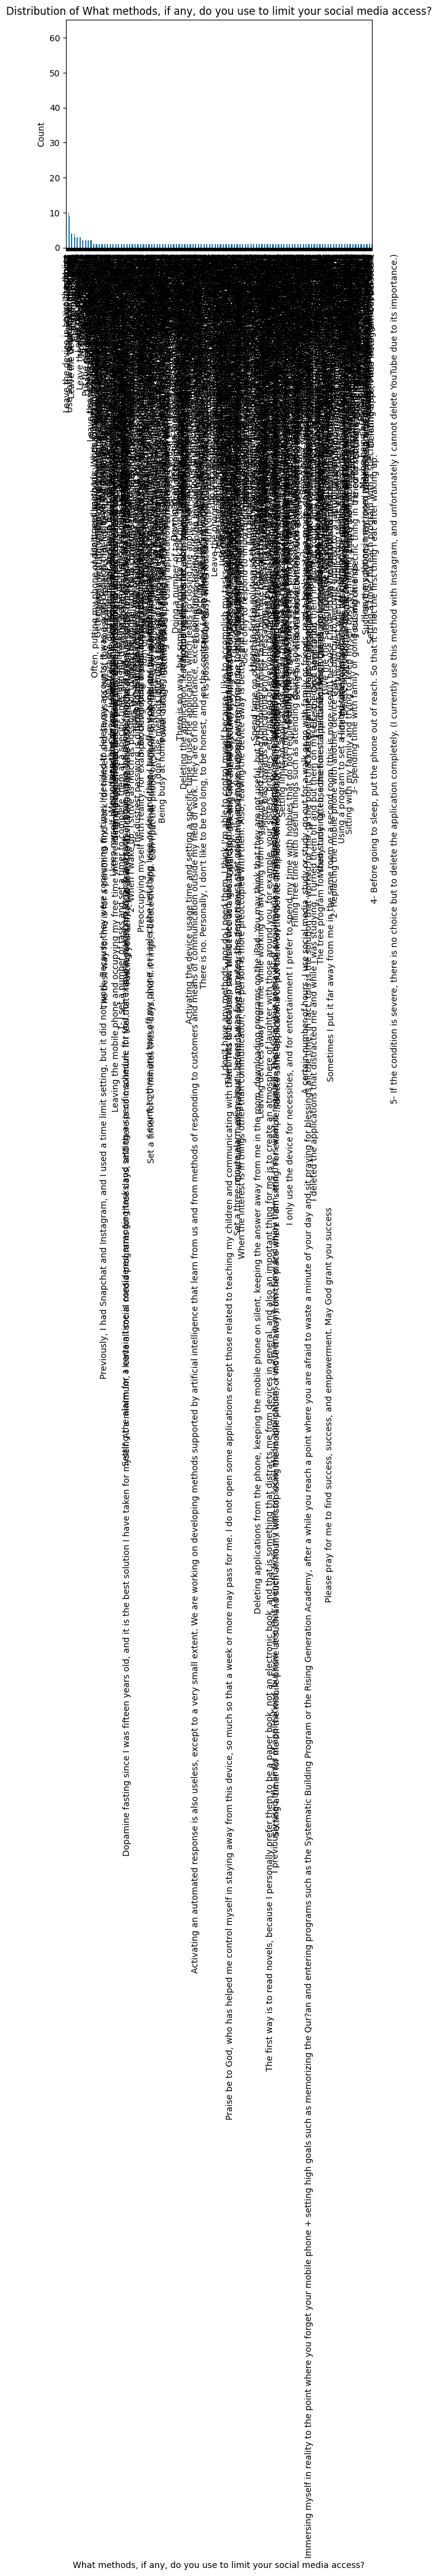

In [26]:
import matplotlib.pyplot as plt

for column in df_X.select_dtypes(include=['object']).columns:
    df_X[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

## 2.4. Conclusion of quality investigation

 By the end of this second investigation, we should have gained a clearer understanding of the overall quality of our dataset. We examined duplicates, missing values, and unwanted or erroneous entries. However, it's important to note that we haven't yet addressed how to handle the remaining missing values or outliers.

## 3. Content Investigation

So far, we've focused on the dataset's general structure and quality. Now, let's dive into its actual content. 

### 3.1. Feature distribution

Now we will examine how values are spread or distributed across a specific feature (column) in the dataset. This helps us understand patterns, identify outliers, or detect skewness, which can impact the analysis or modeling process. Distribution can be visualized with histograms, bar charts, or box plots to give a clearer picture.

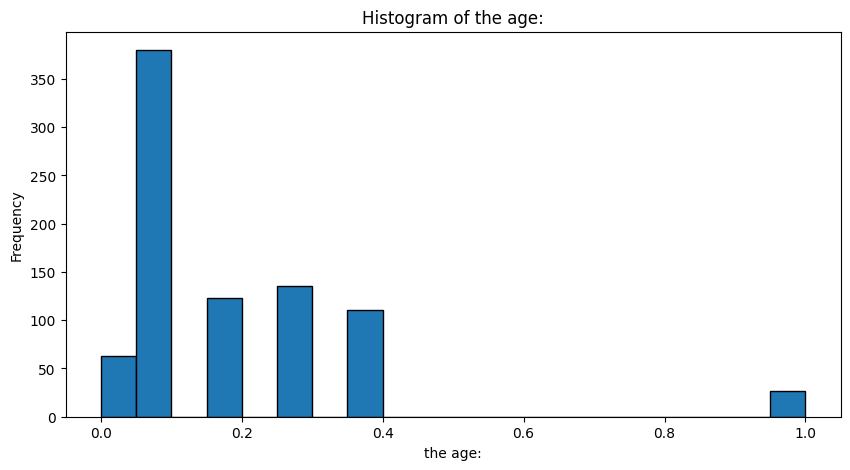

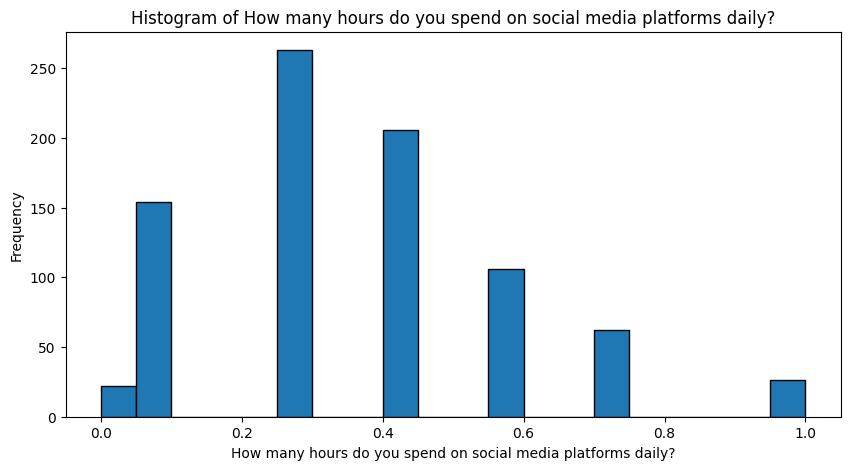

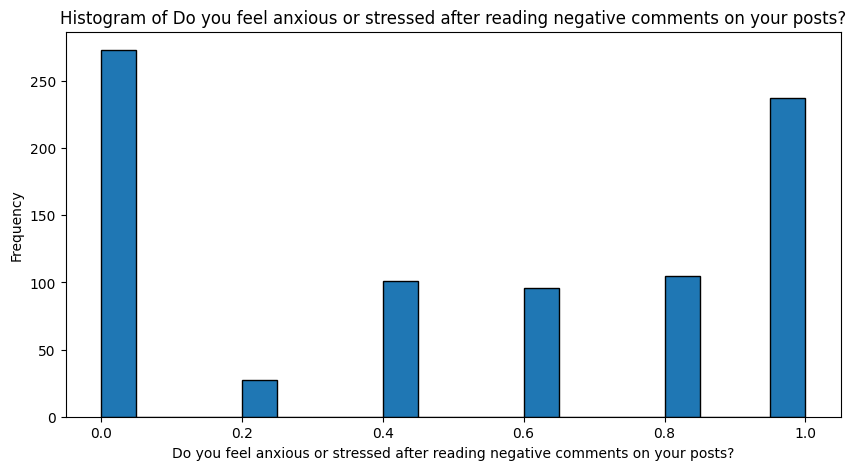

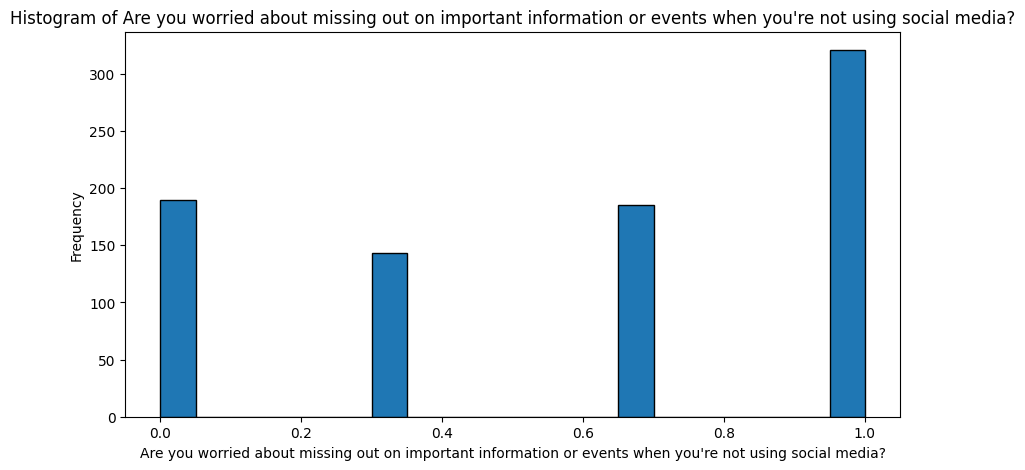

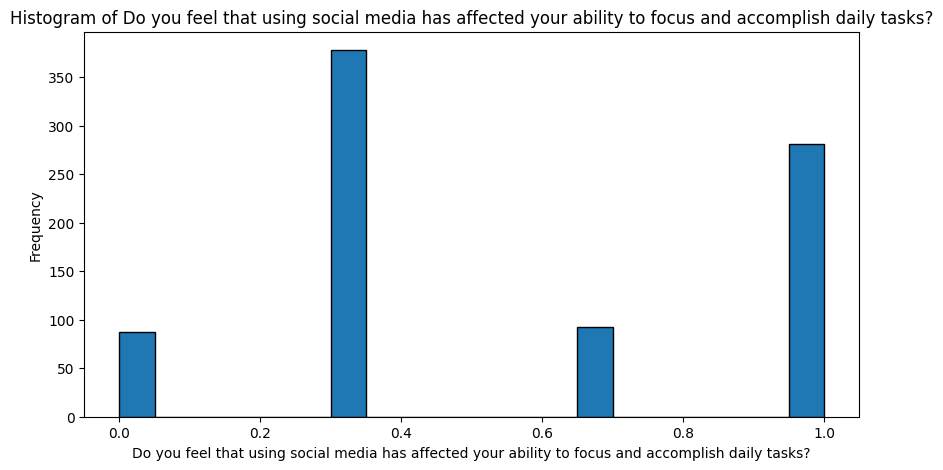

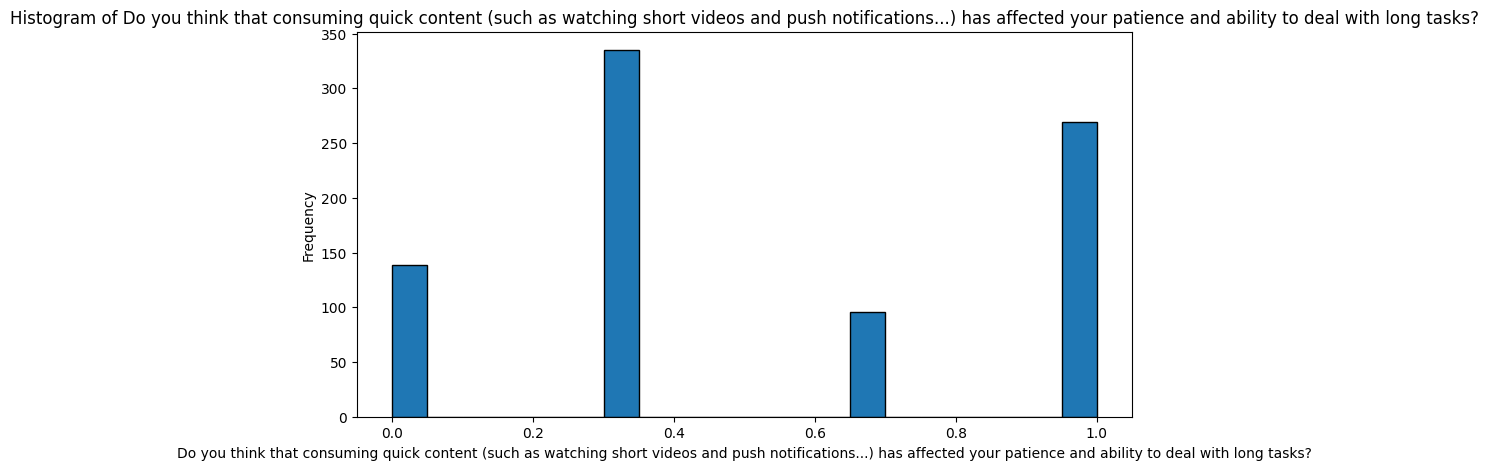

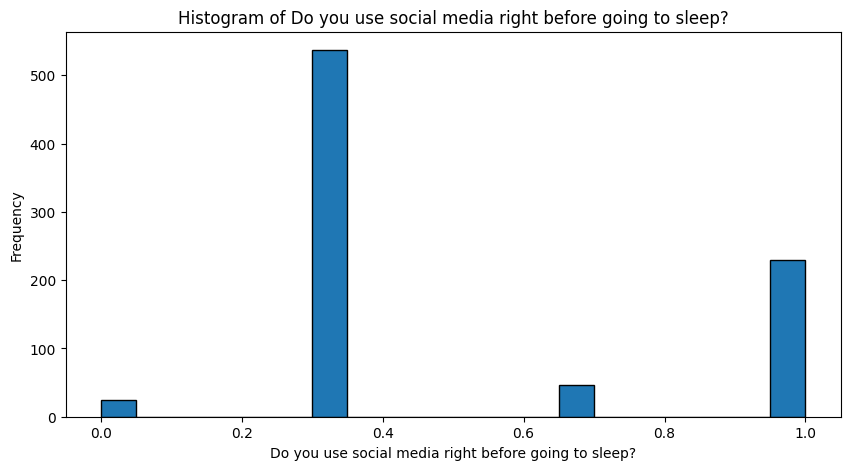

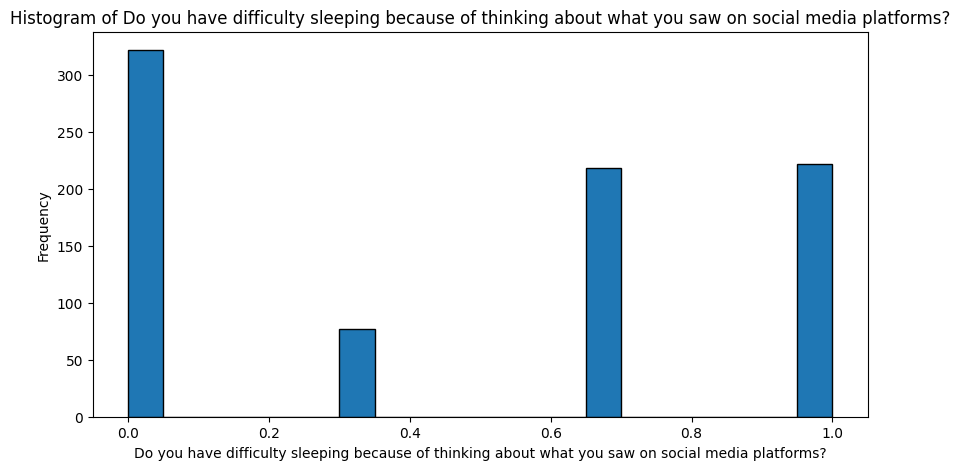

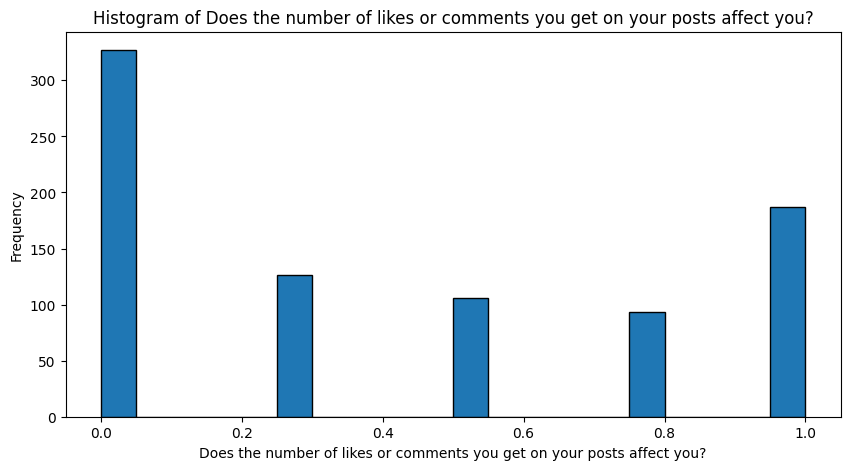

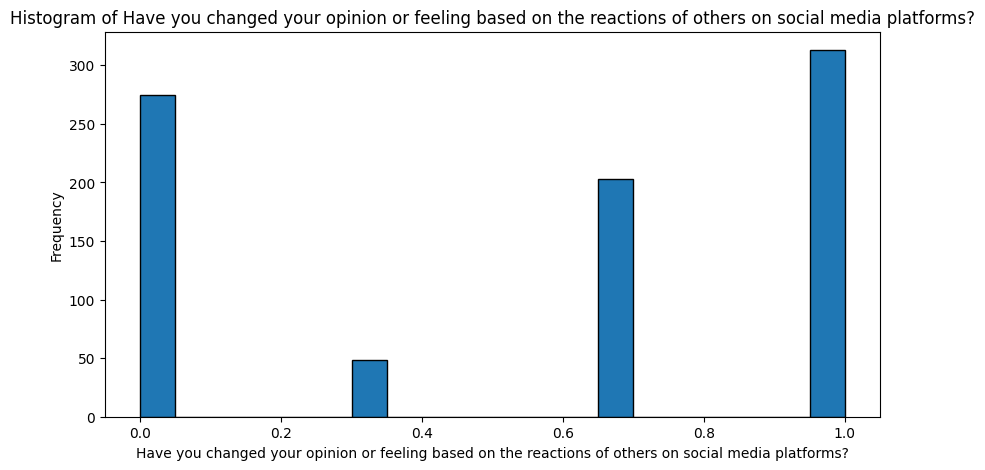

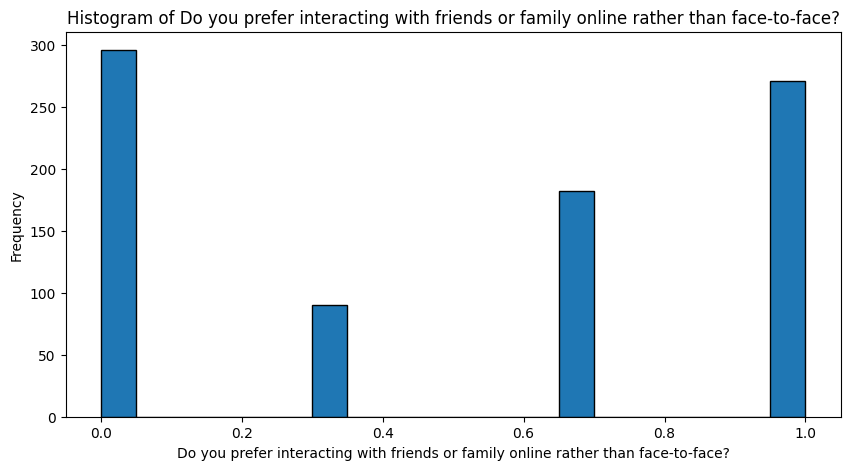

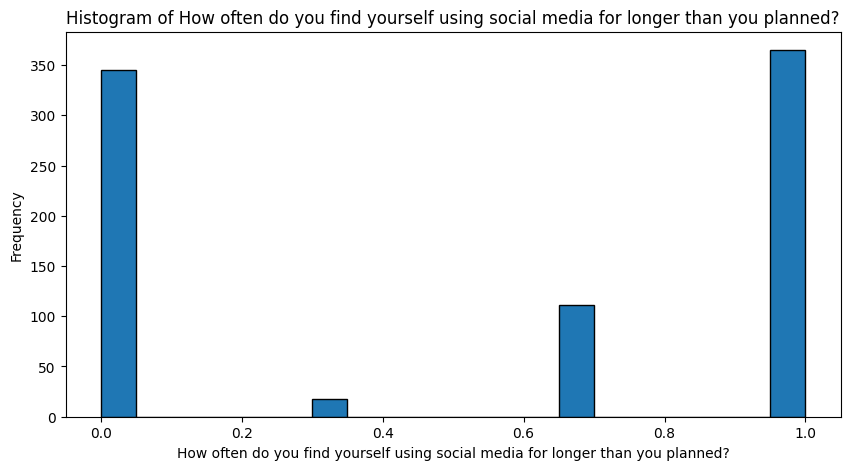

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DonePrimary.csv')

# Generate histograms for each numerical column in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    df[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)  # Turn off the grid to make the plot cleaner
    plt.show()


The histograms we analyzed showcase the distribution of various features related to social media usage, providing critical insights into the behavioral patterns of users. These visualizations help identify skewness, detect outliers, and determine the necessity for data transformations, which are crucial for tailoring preprocessing and modeling strategies. For instance, features like "hours spent on social media" exhibiting a right-skew indicate most users engage for shorter periods, suggesting potential strategies for increasing user engagement. Similarly, the varied response to content consumption and interaction preferences highlighted by the histograms can inform feature engineering, helping to better capture user behavior patterns. Understanding these distributions is essential not only for accurate model training but also for ensuring that the models are generalizable and reflective of the actual population dynamics, thereby enhancing the reliability and applicability of analytical outcomes.

## 3.2. Feature patterns

Now, we look for relationships or trends within the data, such as correlations, repetitive behaviors, or interactions between features. Identifying these patterns helps understand how different features affect the target variable and can guide feature engineering or selection for modeling. 

### 3.2.1. Continuous features

In this analysis, we identify that there is only one continuous feature in our dataset. This limitation impacts our ability to explore complex relationships typically assessed through multiple continuous features.

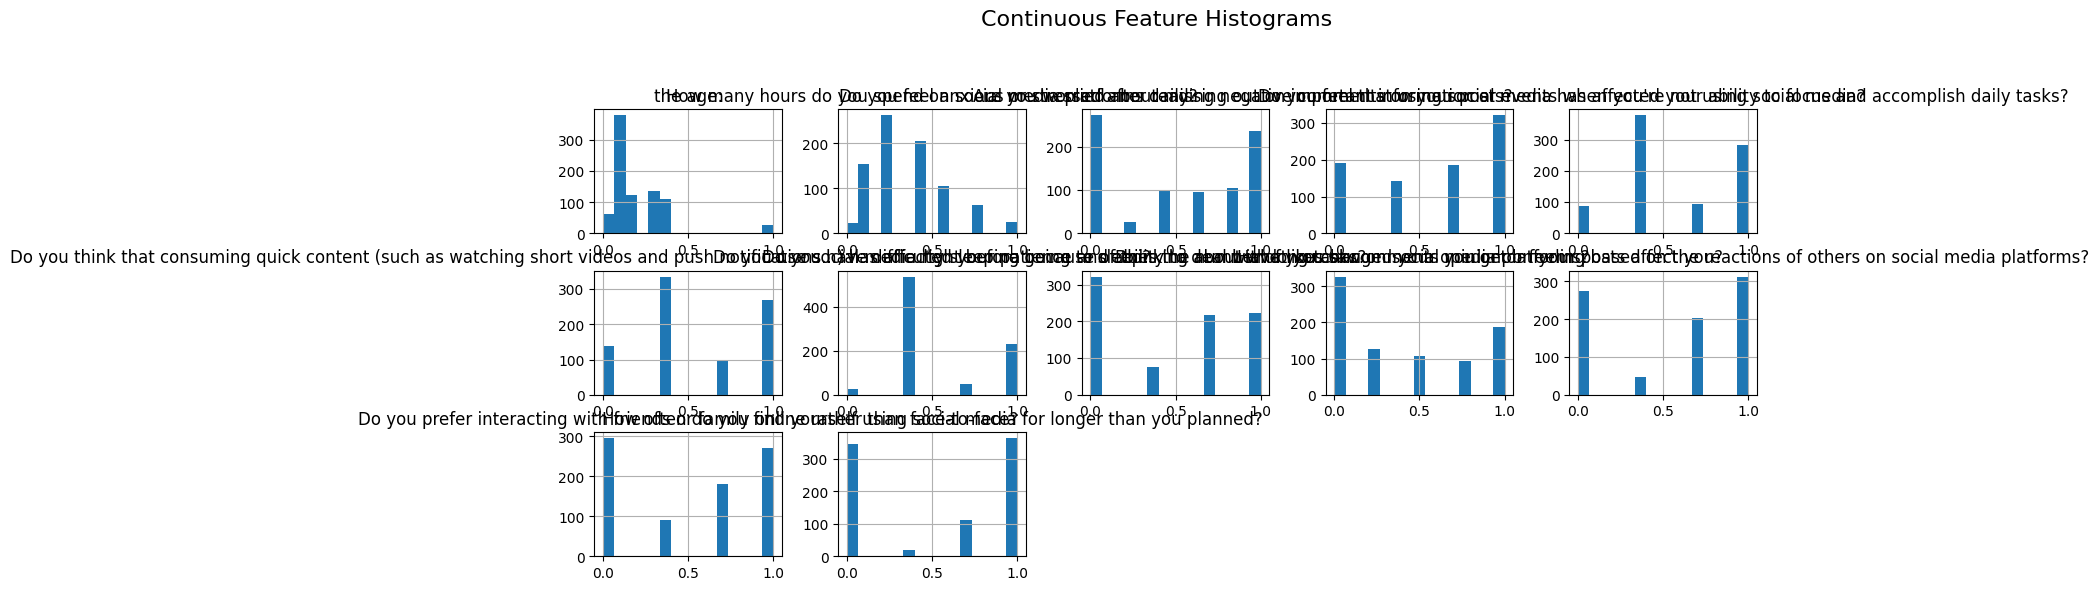

In [125]:
df_X = pd.read_csv('DonePrimary.csv')
df_X[continuous_features].hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.suptitle("Continuous Feature Histograms", fontsize=16)
plt.show()

We analyzed a series of histograms reflecting responses to various questions about social media usage and its impacts. Each histogram quantifies responses to specific queries such as time spent on social media, its influence on focus, and changes in sleeping patterns. The spread of responses across different histograms highlights the diverse perceptions of social media's impact on daily life, indicating varied levels of agreement on its effects on mental health and productivity. 

### 3.2.2. Discrete and ordinal features

Are variables that take on distinct, separate values, often with a limited number of possibilities. 

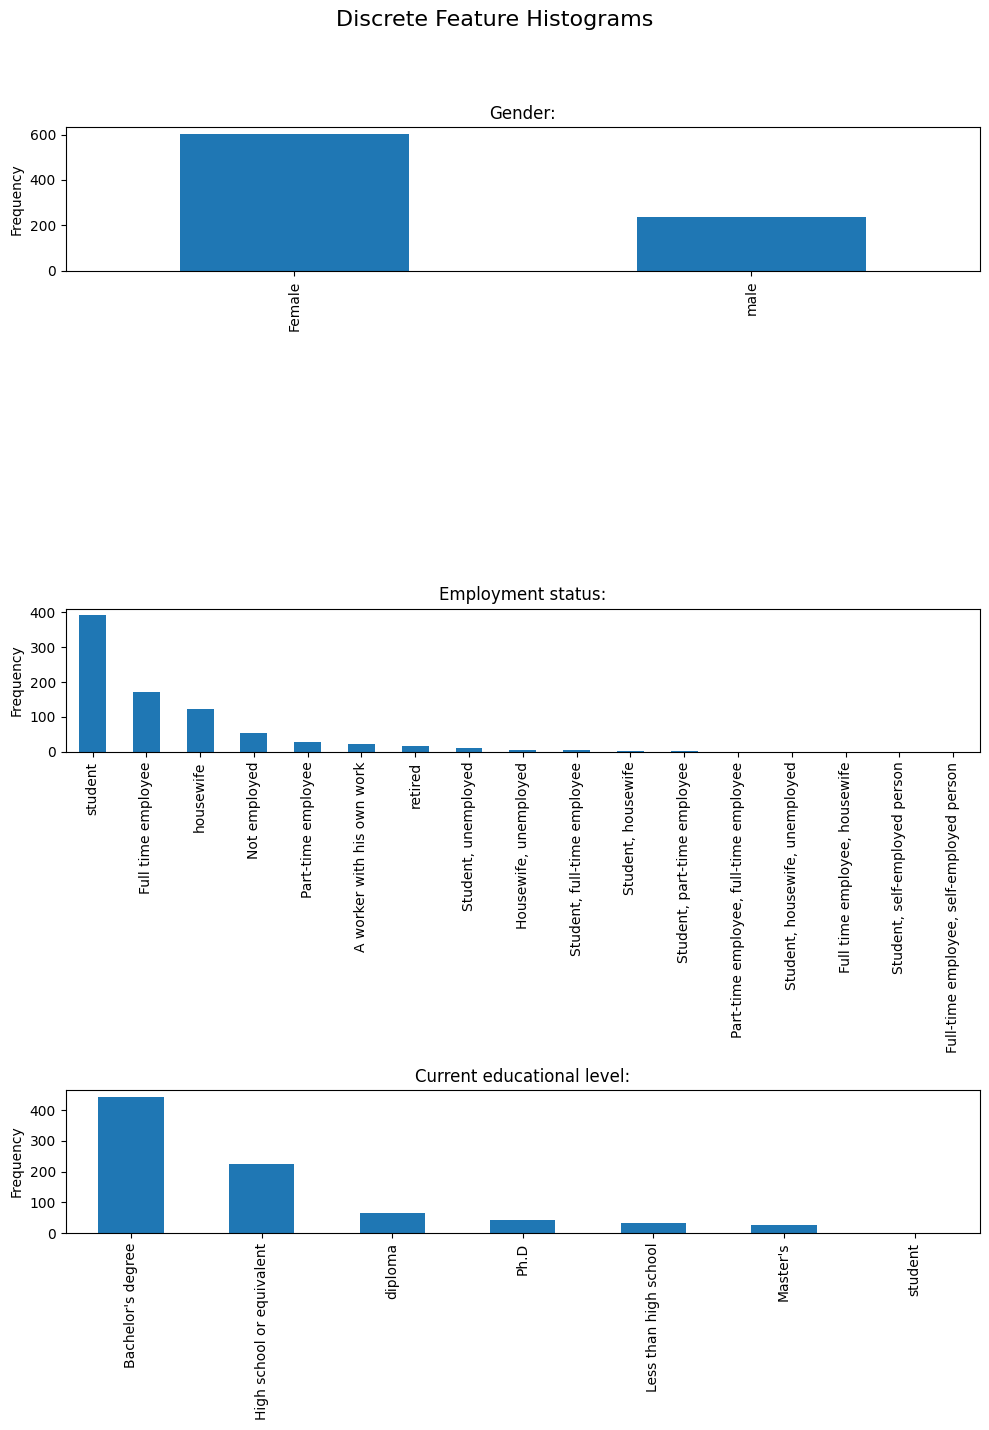

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_X = pd.read_csv('DonePrimary.csv')

# Define your list of discrete features
# For example, let's say you have columns like 'gender', 'marital_status', etc.
discrete_features = ['Gender:', 'Employment status:', 'Current educational level:']

# Filter the DataFrame to include only discrete features
df_discrete = df_X[discrete_features]

# Plot histograms for each discrete feature
fig, axes = plt.subplots(nrows=len(discrete_features), ncols=1, figsize=(10, 15))
fig.suptitle("Discrete Feature Histograms", fontsize=16)

for idx, feature in enumerate(discrete_features):
    df_discrete[feature].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()


he histograms we analyzed provide a clear visualization of the demographic distributions for gender, employment status, and educational level within our dataset:

- Gender: We observe a higher number of female respondents compared to males. This skew could reflect broader trends in social media engagement or survey response rates among different genders and might impact the generalizability of our findings across gender lines.
- Employment Status: Our histogram for employment status reveals a significant proportion of respondents identifying as students, followed by full-time employees. This indicates that our survey may predominantly capture the social media usage habits of younger adults, potentially skewing the data towards behaviors and preferences typical of this demographic.
- Educational Level: The majority of respondents hold a Bachelor's degree, with the next largest group having completed high school or equivalent. The prevalence of higher education levels among our participants suggests that our data might lean towards a more educated subset of the population, which could influence their social media consumption patterns and interaction styles.

## 3.3. Feature relationships

Last but not least, let's examine the relationships between features, specifically focusing on how they correlate. Understanding these correlations is crucial as it can reveal important insights about the interactions between different variables in our dataset. The quickest way to accomplish this is by utilizing pandas' .corr() function. This function allows us to compute a correlation matrix for all numerical features, providing a comprehensive overview of the strength and direction of the relationships between them. By analyzing this matrix, we can identify pairs of features that are strongly correlated, which may inform further analysis or model selection.

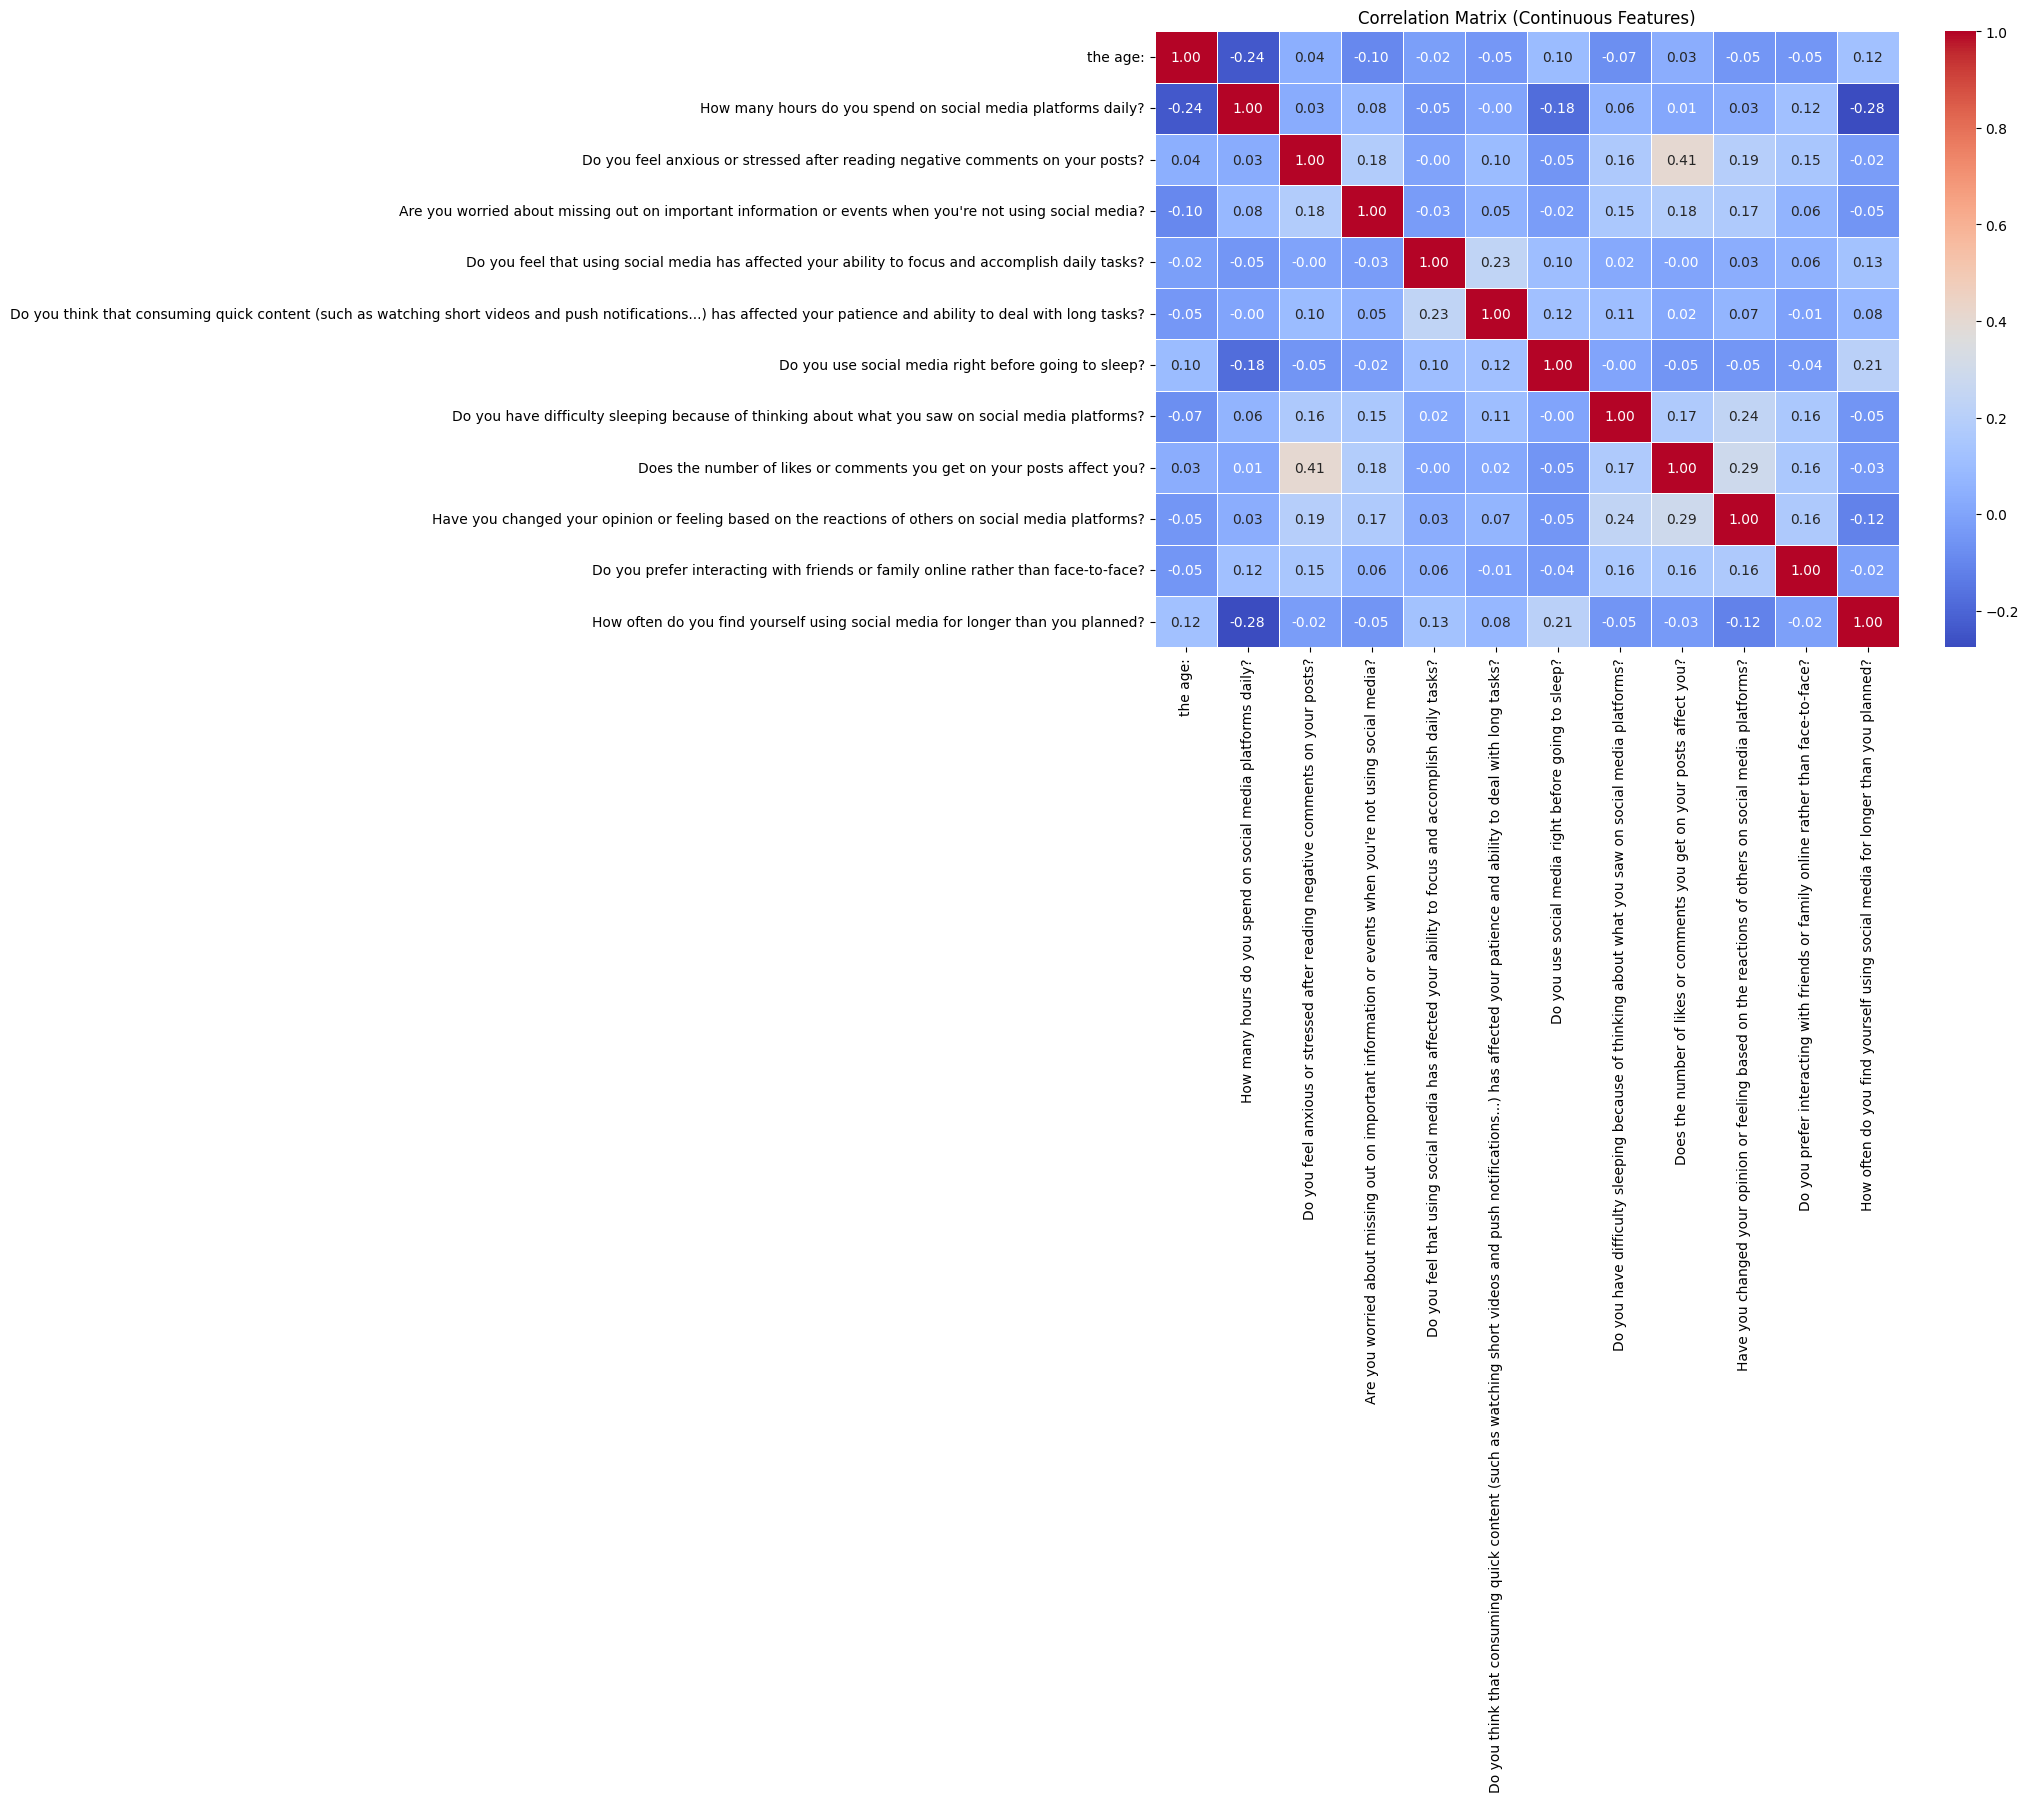

In [128]:
df_X = pd.read_csv('DonePrimary.csv')
# Correlation matrix for continuous features
correlation_matrix = df_X[continuous_features].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Continuous Features)')
plt.show()

We examined a correlation matrix that illustrates the relationships between various factors related to social media usage and their impact on mental health and daily activities. Each cell in the matrix provides a correlation coefficient between pairs of questions, reflecting how strongly one variable is related to another. Significant correlations are highlighted, such as the strong link between the time spent on social media and the increased frequency of staying online longer than planned. Other notable correlations include the impact of social media on users' ability to focus and their stress levels after reading negative comments. This matrix helps us identify which aspects of social media use are most strongly associated with negative mental health outcomes and productivity disruptions.

## 3.4. Conclusion of content investigation

Our survey uncovered significant insights into how social media usage impacts mental health, revealing key demographic tendencies and usage patterns. The predominance of female respondents along with a substantial proportion of students and full-time employees in our data indicates that young adults, in particular, may experience unique challenges and stresses associated with digital environments. These insights are helped understanding how different groups are affected by social media.

The behavioral data from our survey highlighted critical trends, such as the strong correlations between the amount of time spent on social media and negative impacts on focus and sleep. This relationship suggests that extensive social media usage could be detrimental to mental health, emphasizing the need for public health strategies to address these issues. 

## Cleaning 

Empty DataFrame
Columns: []
Index: []


In [87]:
numeric_columns = df_X.select_dtypes(include='number')
print(numeric_columns.head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [91]:
import pandas as pd
data = pd.read_csv('PSurvey_Data.csv')
import numpy as np
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
How many hours do you spend on social media platforms daily?: 110 rows with outliers
Are you worried about missing out on important information or events when you're not using social media?: 143 rows with outliers
Do you feel that using social media has affected your ability to focus and accomplish daily tasks?: 87 rows with outliers
Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?: 0 rows with outliers
Do you use social media right before going to sleep?: 0 rows with outliers
Do you have difficulty sleeping because of thinking about what you saw on social media platforms?: 0 rows with outliers
Have you changed your opinion or feeling based on the reactions of others on social media platforms?: 0 rows with outliers
Do you prefer interacting with friends or family online rather than face-to-face?: 0 rows with outliers
How often do you find yourself using soc

##  Data Pre Prossesing 

Given that our data is primarily non-numerical, the next step is to convert it into a suitable numerical format. This will enable us to leverage various data analysis and machine learning techniques more effectively. 

Data Transformation
Here, we identified and replaced inconsistent or incorrect values in our dataset. For example, we replaced "feminine" with "Female" in the Gender column and corrected city names like "grandmother" to "Jeddah," "the news" to "Khobar," and "City" to "Madinah" in the City column.

In [44]:
survey_data= pd.read_csv('PSurvey_Data.csv')
# Replace "feminine" with "Female" in the Gender column
survey_data['Gender:'] = survey_data['Gender:'].replace("feminine", "Female")

# Replace incorrect city names in the City column
survey_data['Area:'] = survey_data['Area:'].replace({
    "grandmother": "Jeddah", 
    "the news": "Khobar", 
    "City": "Madinah"
})

# Display a sample of the updated dataset
print("\nUpdated data sample after replacing incorrect words:")
print(survey_data[['Gender:', 'Area:']].head(250))


Updated data sample after replacing incorrect words:
    Gender:   Area:
0    Female  Riyadh
1      male  Riyadh
2    Female  Riyadh
3    Female  Riyadh
4    Female  Riyadh
..      ...     ...
245  Female  Riyadh
246  Female  Jeddah
247  Female  Riyadh
248    male  Riyadh
249  Female    Abha

[250 rows x 2 columns]


In [58]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.0 MB 501 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Range(1-5):
Now, we are converting the survey responses into a numerical range from 1 to 5. This step ensures that the data is standardized and ready for analysis.

In [45]:
columns_to_convert = [
    "Do you feel anxious or stressed after reading negative comments on your posts?",
    "Are you worried about missing out on important information or events when you're not using social media?", 
    "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?", 
    "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?", 
    "Do you use social media right before going to sleep?", 
    "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?", 
    "Does the number of likes or comments you get on your posts affect you?", 
    "Have you changed your opinion or feeling based on the reactions of others on social media platforms?", 
    "Do you prefer interacting with friends or family online rather than face-to-face?", 
    "How often do you find yourself using social media for longer than you planned?"
]

response_mapping = {
    "Yes, always": 1,
    "always": 1,
    "Yes, a lot": 2,
    "often": 2,
    "sometimes": 3,
    "Rarely": 4,
    "rarely": 4,
    "No, never": 5,
    "never": 5
}

for column in columns_to_convert:
    survey_data[column] = survey_data[column].replace(response_mapping)

print("\nUpdated data sample with answers converted to range 1-5:")
print(survey_data[columns_to_convert].head(10))


Updated data sample with answers converted to range 1-5:
  Do you feel anxious or stressed after reading negative comments on your posts?  \
0                                                  4                               
1                                                  5                               
2                                                  1                               
3                                                  3                               
4                                                  5                               
5                                                  3                               
6                                                  1                               
7                                                  5                               
8                                                  4                               
9                                                  3                               

   Are you worrie

In [76]:
import pandas as pd

# Sample data based on your description
data = {'Hours': ['12 hours or more', '4-Mar', '10-Sep', '6-May', '8-Jul', '2-Jan', 'Less than an hour', '#VALUE!']}
df = pd.DataFrame(data)

# Function to clean and convert hours
def clean_hours(value):
    # Handle misinterpreted date-like values
    if isinstance(value, str):
        if '-' in value:
            # Extract the numeric part before the '-'
            numeric_part = value.split('-')[0]
            return numeric_part  # Keep the first part as the hour
        elif value == '#VALUE!':
            return None  # Remove invalid entries
        elif 'less than an hour' in value.lower():
            return 0.5  # Convert "less than an hour" to 0.5 hours
        elif 'hours or more' in value.lower():
            return 13  # Assign 12 for "12 hours or more"
        elif 'hour' in value.lower():
            # Extract the numeric part from general hour strings
            return int(value.split()[0])  # Convert hours like '2 hours' to 2
    return value

# Apply the cleaning function
df['Hours_Cleaned'] = df['Hours'].apply(clean_hours)

# Drop rows with missing values
df_cleaned = df.dropna(subset=['Hours_Cleaned'])

# Display unique cleaned values
unique_hours_cleaned = df_cleaned['Hours_Cleaned'].unique()
print(unique_hours_cleaned)


[13 '4' '10' '6' '8' '2' 0.5]


we performed normalization on all numerical columns to standardize the data, ensuring each feature contributed equally to the analysis. 

## Open-ended question analysis

The goal is to categorize the responses into thematic groups and determine the sentiment of the respondents. The survey question being analyzed is: "How do you feel when you compare your life to the lives of others on social media?".
By examining the language used in the responses, we aim to uncover patterns in how individuals perceive the impact of social media on their lives, categorizing the responses into key themes such as inspiration, frustration, and satisfaction, while also determining whether the sentiments expressed are positive, negative, or neutral.

### Q1: How do you feel when you compare your life to the lives of others on social media?

To analyze how people feel when comparing their lives to others on social media, we employed Sentiment Analysis using VADER and Thematic Categorization with predefined keywords to detect themes such as inspiration or frustration. We filtered out non-expressive texts to focus on meaningful responses. Results were visualized using Matplotlib, revealing a mix of positive, neutral, and negative sentiments. This comprehensive approach provided insights into the diverse emotional impacts of social media comparisons, highlighting a significant occurrence of positive responses.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Ensure NLTK VADER lexicon is downloaded
import nltk
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('DonePrimary.csv')

# Check if the specific question is in the dataset
if 'How do you feel when you compare your life to the lives of others on social media?' in df.columns:
    sia = SentimentIntensityAnalyzer()
else:
    print("The column is not in the dataset.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/refalammari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [140]:
# Function to check for meaningless text
def is_meaningless(text):
    return bool(re.match(r'^\W*$', text.strip()))

# Defining themes with keywords
themes = {
    'inspiration': [
        'inspire', 'motivate', 'challenge', 'change', 'development', 
        'skills', 'learn', 'positive', 'motivation', 'accomplish', 
        'achieve', 'incentive', 'aspiration', 'striving', 'motivated',
        'inspired', 'satisfied'
    ],
    'frustration': [
        'frustration', 'inadequacy', 'incomplete', 'sadness', 'lack', 
        'inferior', 'dissatisfaction', 'self-blame', 'helpless', 'anxiety', 
        'negative', 'loss', 'worried', 'frustrated', 'broken'
    ],
    # Add other themes similarly...
}

# Theme categorization function
def categorize_theme(text):
    if is_meaningless(text):
        return 'Not Expressive'
    tokens = re.findall(r'\b\w+\b', text.lower())
    for theme, keywords in themes.items():
        if any(token in keywords for token in tokens):
            return theme
    return 'Other'

# Sentiment analysis function
def categorize_sentiment(text):
    if is_meaningless(text):
        return 'Not Expressive'
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [146]:
# Applying the categorization functions
df['Theme'] = df['How do you feel when you compare your life to the lives of others on social media?'].apply(categorize_theme)
df['Sentiment'] = df['How do you feel when you compare your life to the lives of others on social media?'].apply(categorize_sentiment)

# Counting themes and sentiments
theme_counts = df['Theme'].value_counts()
sentiment_counts = df['Sentiment'].value_counts()


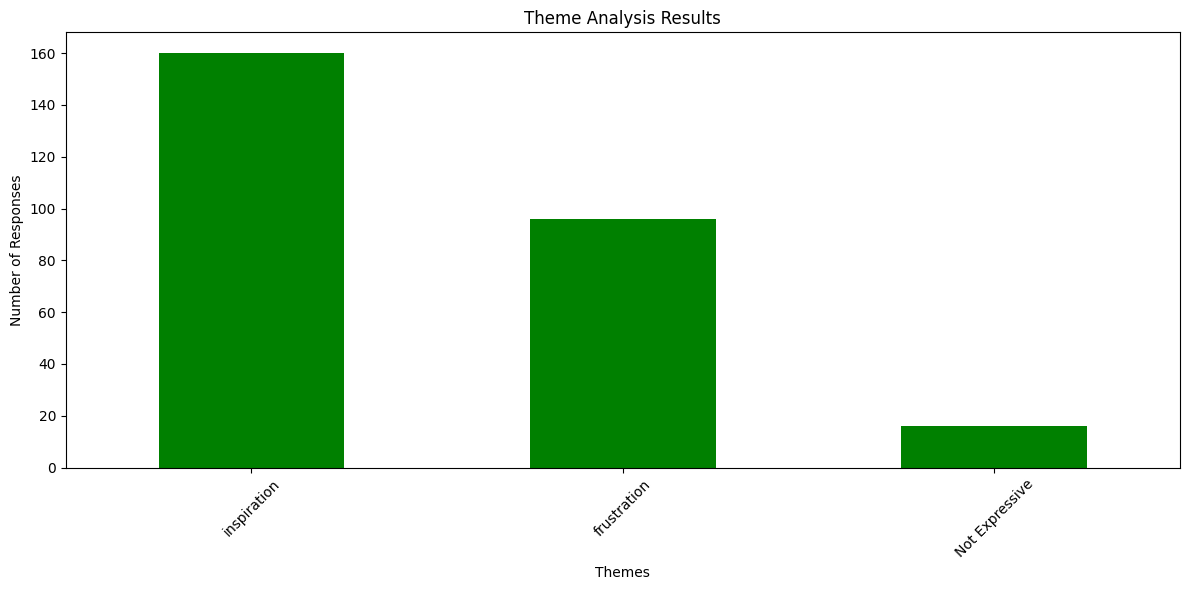

In [147]:

# Plot for Theme Analysis Results
plt.figure(figsize=(12, 6))
theme_counts[theme_counts.index != 'Other'].plot(kind='bar', color='green')
plt.title('Theme Analysis Results')
plt.xlabel('Themes')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The chart shows a significant prevalence of 'Inspiration' as a theme, with a notable count also falling under 'Frustration'. Interestingly, a smaller segment of responses were categorized as 'Not Expressive'. This indicates that a good number of people find positive motivation or inspiration when making social media comparisons, contrary to the common assumption that such comparisons typically lead to negative emotions.

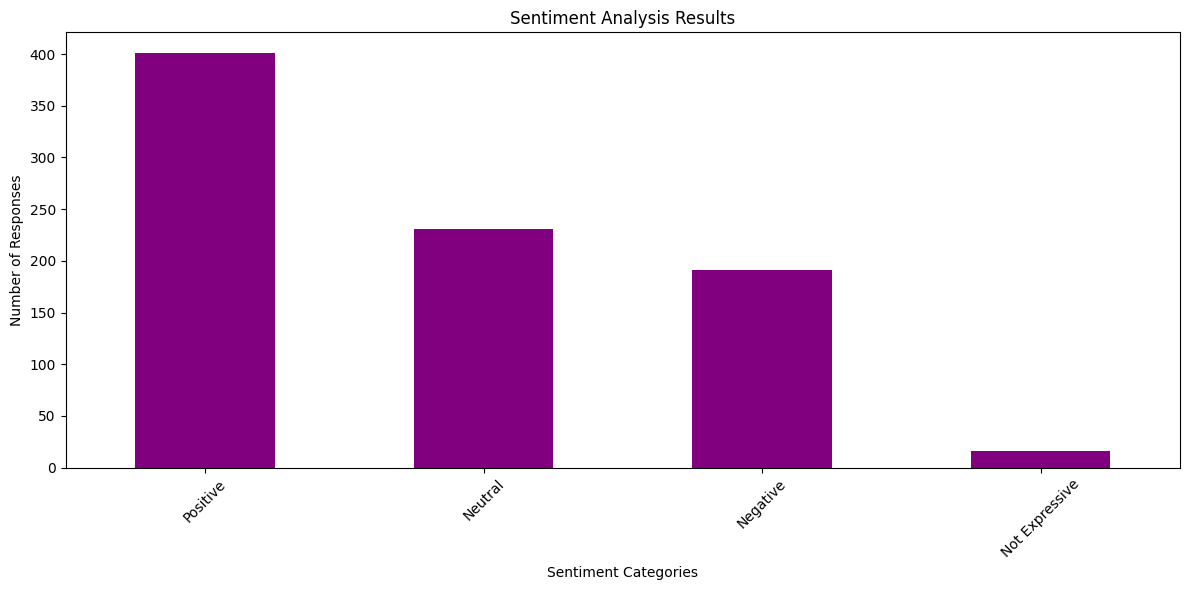

In [148]:
# Plot for Sentiment Analysis Results
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='bar', color='purple')
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In this "Sentiment Analysis Results" chart, the majority of responses were categorized as 'Positive', which is surprising. It was anticipated that negative sentiments would dominate due to the often-discussed negative impact of social media on self-esteem and happiness. However, the data shows a substantial number of neutral and positive sentiments, suggesting that not all social media comparisons lead to negative feelings. The 'Negative' category, while substantial, is not as dominant as hypothesized, and the 'Not Expressive' category is minimal.

These findings challenge the common narrative that comparing oneself to others on social media predominantly leads to negative emotions like envy, inadequacy, or sadness. Instead, it appears that many individuals derive inspiration or maintain a neutral stance. This could be indicative of a segment of social media users who have learned to extract positive value from these platforms, perhaps by following content that motivates personal growth or by maintaining a healthy perspective on social media portrayals. 

### Q2: What methods, if any, do you use to limit your social media access?

We enhanced our analysis from the foundational techniques used previously. Initially, our approach centered on tokenization, which involved breaking down each response into individual words or tokens, making it easier to systematically identify specific keywords and patterns mentioned by participants. These keywords related to strategies such as "time management," "tools," and "distraction" were then used to assign initial codes to each response. After mapping these codes to broader themes like "Time Management," "Application Limits," and "No/Nothing Responses," we visualized the frequency of each theme using a bar chart. 

Building on this, our updated analysis involves more detailed preprocessing steps, like stopword removal to refine the focus on meaningful words and a more rigorous word frequency analysis. This allows us to capture deeper insights into the specific strategies used by individuals, offering a more detailed understanding of their approaches to managing social media usage.

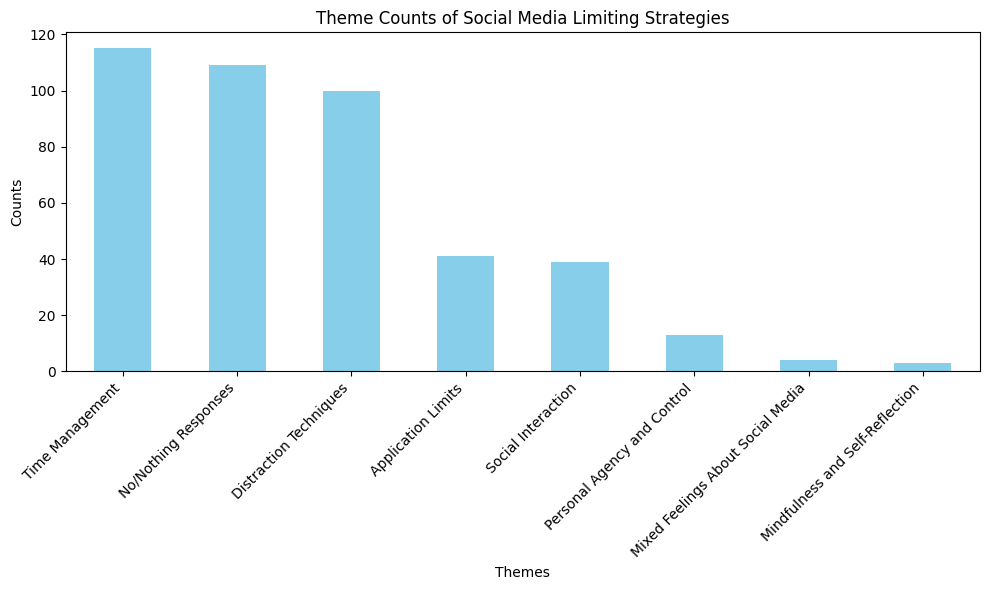

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset
df = pd.read_csv('DonePrimary.csv')

# Define a function to clean the responses
def clean_response(text):
    text = str(text).strip()
    if text in ['.', '', 'A', 'B', '??', '...']:
        return None
    return text

# Apply the cleaning function and drop missing values
df['cleaned_response'] = df['What methods, if any, do you use to limit your social media access?'].apply(clean_response)
df = df.dropna(subset=['cleaned_response'])

# Tokenize the cleaned responses
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

df.loc[:, 'tokens'] = df['cleaned_response'].apply(tokenize)

# Define initial codes based on keywords
initial_codes = {
    'time_management': ['limit', 'time', 'hours', 'schedule', 'timer'],
    'tools': ['apps', 'blocker', 'delete'],
    'personal_strategies': ['detox', 'break', 'reward', 'go out', 'hobbies'],
    'distraction': ['busy', 'occupy', 'family', 'friends', 'chores'],
    'mindfulness': ['reflect', 'think', 'impact'],
    'social_interaction': ['gathering', 'friends', 'family'],
    'personal_control': ['control', 'decide', 'goals'],
    'mixed_feelings': ['enjoy', 'positive', 'reward'],
    'no_nothing': ['no', 'nothing'],
}

# Code responses based on tokens
def code_response(tokens):
    codes = []
    for code, keywords in initial_codes.items():
        if any(keyword in tokens for keyword in keywords):
            codes.append(code)
    return codes

df.loc[:, 'codes'] = df['tokens'].apply(code_response)

# Define themes based on codes
themes = {
    'Device Management': ['device_management'],
    'Application Limits': ['tools'],
    'Time Management': ['time_management'],
    'Mixed Feelings About Social Media': ['mixed_feelings'],
    'Distraction Techniques': ['distraction'],
    'Mindfulness and Self-Reflection': ['mindfulness'],
    'Social Interaction': ['social_interaction'],
    'Personal Agency and Control': ['personal_control'],
    'No/Nothing Responses': ['no_nothing'],
}

# Assign themes to responses
def assign_theme(codes):
    assigned_themes = []
    for theme, codes_list in themes.items():
        if any(code in codes for code in codes_list):
            assigned_themes.append(theme)
    return assigned_themes

df.loc[:, 'themes'] = df['codes'].apply(assign_theme)

# Count the frequency of each theme
theme_counts = df['themes'].explode().value_counts()

# Visualize the frequency of themes
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.title('Theme Counts of Social Media Limiting Strategies')
plt.xlabel('Themes')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Now, To analyze the responses about limiting social media usage, we initially employed several text processing techniques. We started with tokenization, which involves breaking down the text into individual words or tokens. This step is crucial for parsing the raw data into a manageable form. We then applied a stopword removal process to filter out common words that do not contribute significantly to the meaning of the text, such as "the," "is," and "and." This helps focus on the more meaningful words that are relevant to our analysis. After these preprocessing steps, we utilized word frequency analysis to count how often each word appeared in the responses. This quantitative measure allowed us to identify the most commonly mentioned methods for limiting social media use, providing clear insights into popular strategies among the respondents. The resulting data was then visualized in a bar chart, highlighting the frequency of each significant word and offering a visual representation of the trends and patterns in the data.

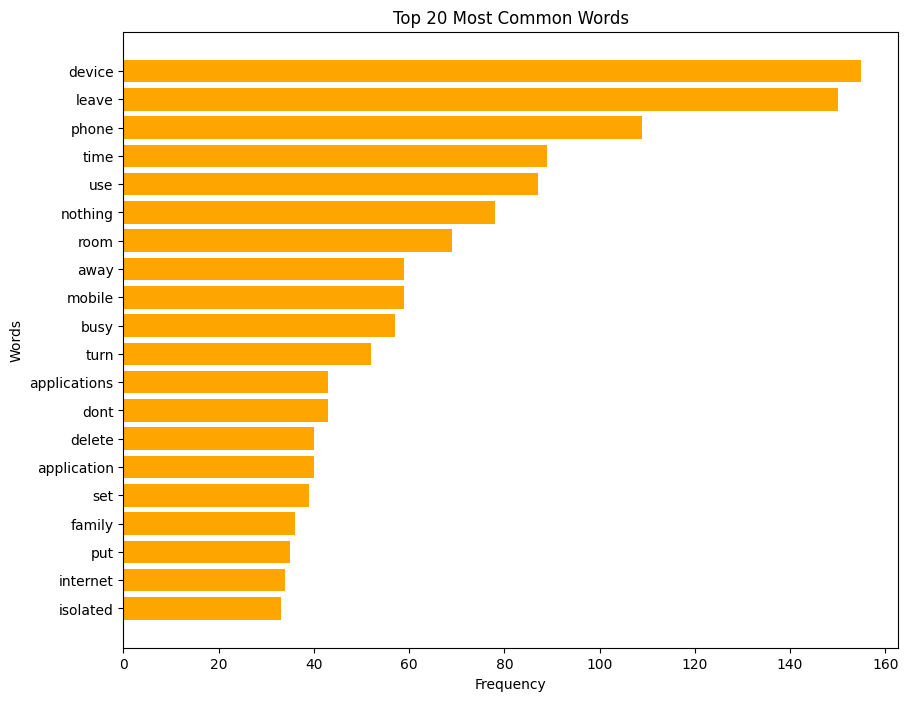

In [138]:
import pandas as pd
from collections import Counter
import string
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('DonePrimary.csv')

# Define a basic set of English stopwords
basic_stopwords = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
                   'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
                   'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these',
                   'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
                   'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
                   'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
                   'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
                   'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
                   'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
                   'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
                   'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
                   'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

# Function to clean and tokenize text using basic string operations
def simple_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text by splitting on whitespace
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in basic_stopwords]
    return tokens

# Apply the simple tokenize function to the column and flatten the list of tokens
all_tokens = [token for response in data["What methods, if any, do you use to limit your social media access?"].astype(str) for token in simple_tokenize(response)]

# Calculate word frequency
word_freq = Counter(all_tokens)

# Extract the top 20 words and their frequencies
top_words = word_freq.most_common(20)
words, frequencies = zip(*top_words)

# Plotting the frequencies of the most common words
plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


Looking at the bar chart displaying the top 20 most common words related to limiting social media usage, we can see that "device," "leave," and "phone" are among the most frequently mentioned. This suggests that common strategies involve physically distancing oneself from digital devices. The presence of words like "time" and "use" implies that setting time limits or specific usage rules are also popular methods. Interestingly, "nothing" ranks high, indicating a significant number of respondents do not use any specific strategies to limit their social media interaction. 


## Statistical Summarise: 

### Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:

In [67]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('SurveyData.csv')

# Compute summary statistics
summary = df.describe()

# Display the summary statistics
print(summary)


       the age:   Gender:   Area: Current educational level: marital status:  \
count       851       851     851                        851             851   
unique        6         2      20                          7               4   
top       18-24  feminine  Riyadh          Bachelor's degree        bachelor   
freq        384       606     448                        446             501   

       Employment status: Do you use social media applications?  \
count                 851                                   851   
unique                 17                                     2   
top               student                                   Yes   
freq                  395                                   839   

                  What social media platforms do you use?  \
count                                                 851   
unique                                                246   
top     Instagram, X (Twitter), TikTok, Snapchat, Yout...   
freq               

Using the summary_stats() function, the dataset reveals several key insights:

- The age distribution is concentrated among the 18-24 group, which makes up the largest portion of respondents (384).
- The gender distribution is skewed towards feminine, with 606 respondents identifying as such.
- Riyadh is the most represented area, with 448 participants, indicating a strong regional concentration.
- In terms of education, most respondents have a Bachelor’s degree (446), reflecting a highly educated sample.
- The majority of respondents are single (501).
- A significant number of participants are students (395).
- Social media usage is widespread, with 839 respondents saying they use social media, and WhatsApp being the most frequently used app (235 users).

These summary statistics suggest that the dataset is dominated by young, educated, and feminine respondents, primarily from Riyadh, who actively use social media, particularly WhatsApp.

### Show the Variance:

In [129]:
import pandas as pd

# Load the DonePrimary.csv dataset
df_cleaned = pd.read_csv('DonePrimary.csv')

# Calculate the variance for all numerical columns
variance_all_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).var()

# Display the variance for all numerical columns
print("Variance for all numerical columns:")
print(variance_all_columns)


Variance for all numerical columns:
the age:                                                                                                                                                               0.037617
How many hours do you spend on social media platforms daily?                                                                                                           0.052311
Do you feel anxious or stressed after reading negative comments on your posts?                                                                                         0.168641
Are you worried about missing out on important information or events when you're not using social media?                                                               0.155843
Do you feel that using social media has affected your ability to focus and accomplish daily tasks?                                                                     0.121913
Do you think that consuming quick content (such as watching short videos and push no



Variance measures the spread or dispersion of data points in your dataset, showing how far the values deviate from the mean. In this context, high variance indicates that the data points are spread out widely, while low variance suggests that the data points are closer to the mean.


- Age likely has moderate variance, given the range of age groups (e.g., 18-24, 25-34) and the significant portion of respondents in the 18-24 group, suggesting that some variation exists, but it may not be extreme.
- Gender has very low variance because the distribution is heavily skewed towards feminine (606 out of 851 respondents), indicating that most data points fall into one category.
- City (Area) may have higher variance due to the large number of unique values (20 areas), but Riyadh dominates, so the variance might be moderate.
- Social media usage has low variance as the majority of respondents use social media and most frequently use WhatsApp, so the values don't vary much between respondents.

In general, understanding the variance helps assess the diversity or homogeneity of your dataset, which could impact the type of analysis and models applied.

## Data Visualization

The primary objective of this analysis is to visually explore key variables related to social media usage, its impact on distraction, and demographic factors. By creating visualizations, we seek to uncover patterns and insights that shed light on how various demographic groups interact with social media and how this influences their focus and behavior.

here we will show insights that are most relevant to our research question.

In [80]:
#import reqiuere librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### How does the number of hours spent on social media correlate with mental health outcomes, and what specific effects might prolonged use have on well-being?

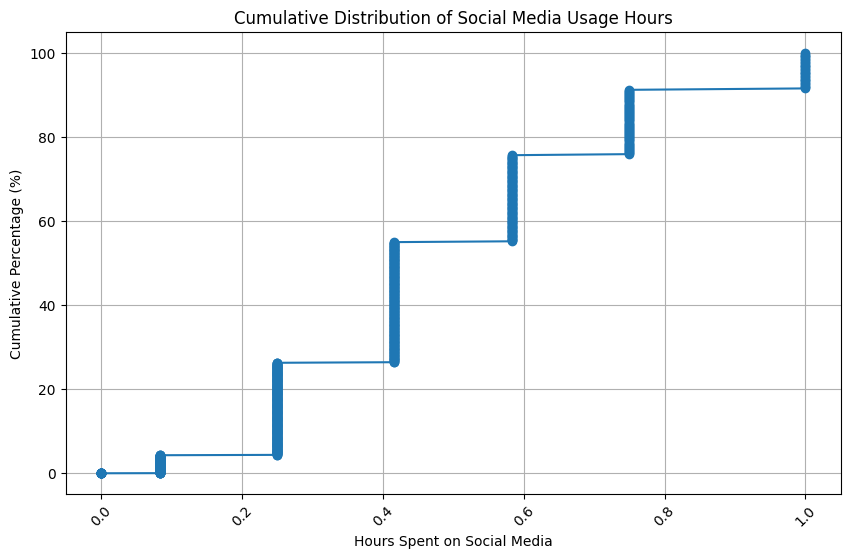

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
surveyData = pd.read_csv('DonePrimary.csv')

# Clean the 'Hours' column to be numeric
surveyData['Hours_Cleaned'] = pd.to_numeric(surveyData['How many hours do you spend on social media platforms daily?'], errors='coerce')

# Sort data for cumulative plotting
sorted_data = surveyData.sort_values('Hours_Cleaned')

# Calculate the cumulative distribution of hours
sorted_data['cumulative_percentage'] = np.cumsum(sorted_data['Hours_Cleaned']) / sorted_data['Hours_Cleaned'].sum() * 100

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Hours_Cleaned'], sorted_data['cumulative_percentage'], marker='o', linestyle='-')
plt.title('Cumulative Distribution of Social Media Usage Hours')
plt.xlabel('Hours Spent on Social Media')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


From the plot, we can observe if there is any visible trend indicating that increased hours on social media correlate with decreased ability to focus. If the points show a downward trend as hours increase, it suggests that more time on social media may negatively affect focus. Conversely, a lack of trend or a flat distribution would suggest no strong relationship between the two variables in the sampled population. This visualization helps to initially assess patterns that might warrant further statistical analysis to confirm any significant effects.

### Do individuals with varying patterns of social media platform usage report different impacts on their mental health?

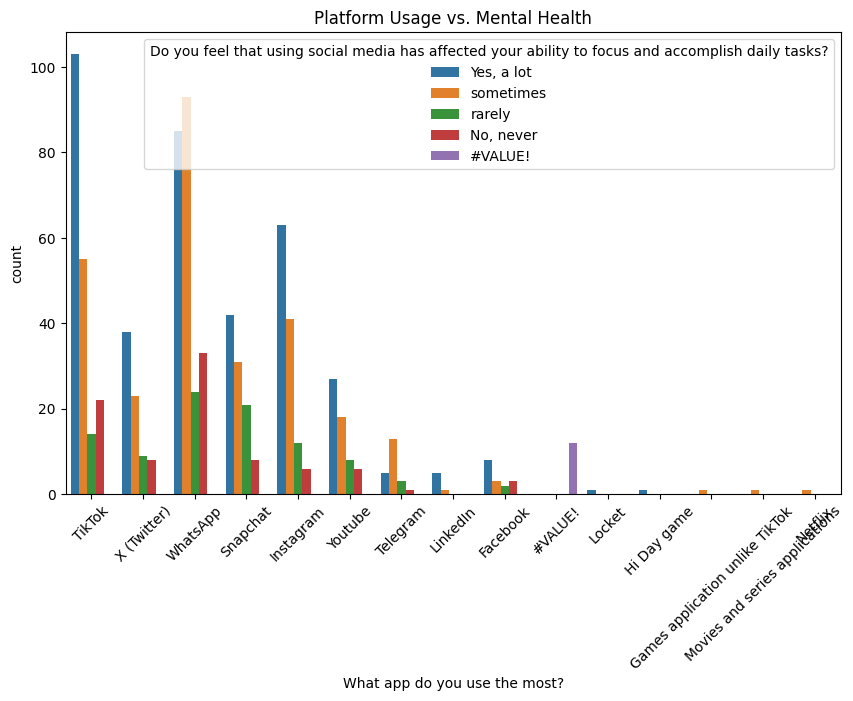

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
surveyData = pd.read_csv('surveyData.csv')

# Bar plot to compare social media platform usage and mental health outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x='What app do you use the most?', hue='Do you feel that using social media has affected your ability to focus and accomplish daily tasks?', data=surveyData)
plt.title('Platform Usage vs. Mental Health')
plt.xticks(rotation=45)
plt.show()

The bar chart shows how users of different social media platforms perceive their impact on mental health, particularly focusing ability and task completion. Platforms like TikTok and Instagram have higher counts of users reporting negative impacts, as seen in the taller bars for scores 4 and 5. In contrast, platforms like LinkedIn show lower impact scores, suggesting a less detrimental effect on mental health. This visualization effectively illustrates that user experiences vary significantly across different platforms, addressing the question of whether platform usage patterns influence mental health outcomes.

### How does marital or relationship status shape the perceived effects of social media on mental health?

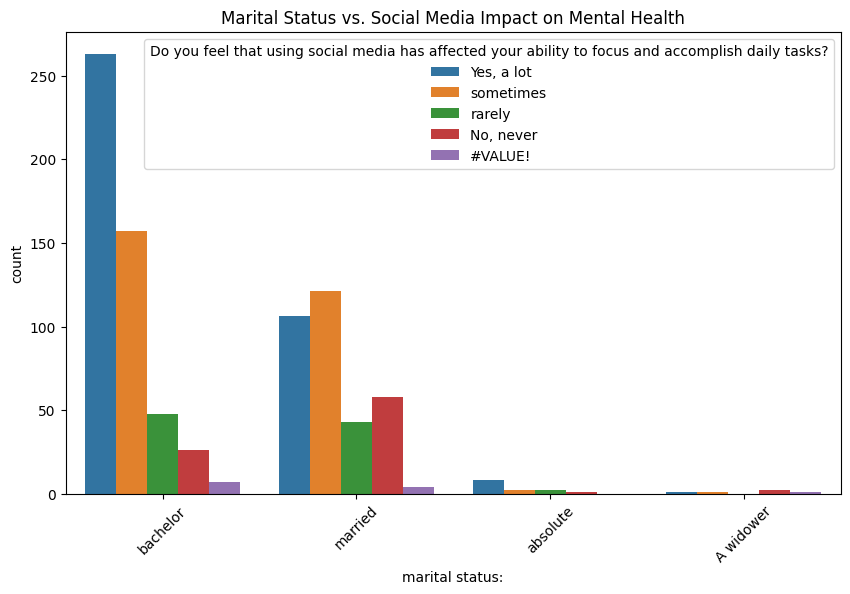

In [11]:
# Grouped bar plot for marital status and perceived effects of social media on mental health
plt.figure(figsize=(10, 6))
sns.countplot(x='marital status:', hue='Do you feel that using social media has affected your ability to focus and accomplish daily tasks?', data=surveyData)
plt.title('Marital Status vs. Social Media Impact on Mental Health')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates how different marital statuses perceive the impact of social media on their ability to focus and accomplish tasks:

- Bachelors report a high impact, suggesting social media significantly affects their mental focus.
- Married individuals show varied responses, with fewer reporting the highest impact, indicating a possible buffering effect of marital support.
- Divorced/separated and widowed respondents are less represented, hinting at lower perceived impacts or smaller sample sizes.



### Are there notable differences in the impact of social media on mental health among employed, unemployed, and student populations?

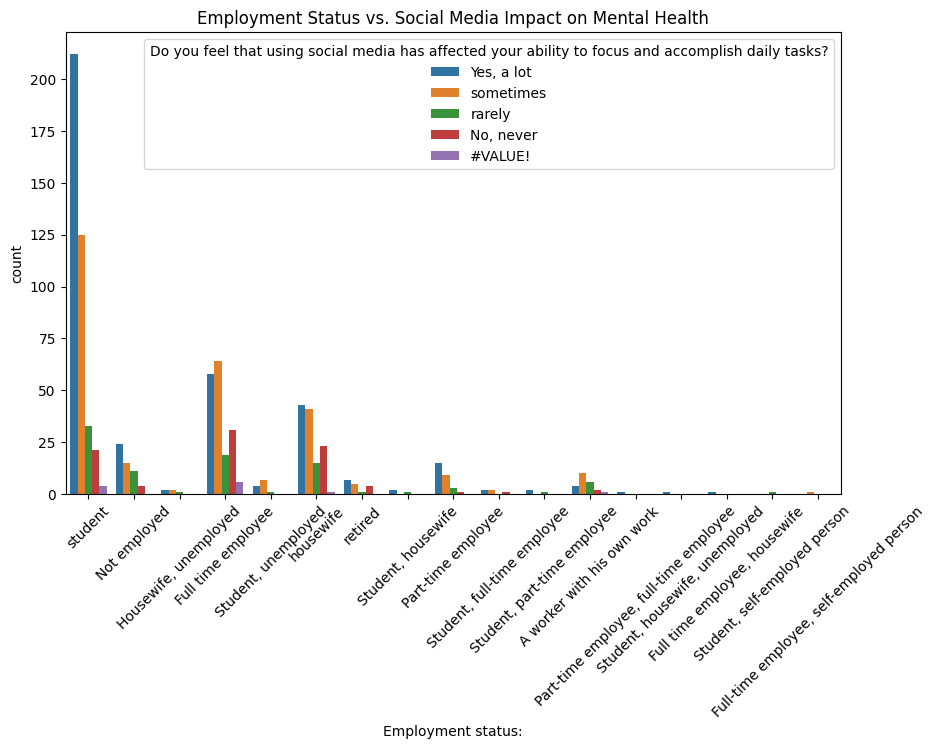

In [12]:
# Grouped bar plot for employment status and mental health outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment status:', hue='Do you feel that using social media has affected your ability to focus and accomplish daily tasks?', data=surveyData)
plt.title('Employment Status vs. Social Media Impact on Mental Health')
plt.xticks(rotation=45)
plt.show()


The bar chart comparing employment status with the perceived impact of social media on mental health reveals:

- Students are prominently affected, with high response rates across all levels of impact, indicating significant disruption in focus due to social media.
- Employed individuals exhibit a spread in responses with a concentration in the lower impact levels, suggesting that while social media affects their focus, the effect is generally milder.
- Unemployed respondents, though fewer in number, show varied responses, indicating no consistent pattern of impact across this group.


### Is there a particular age range that is more significantly affected by social media's impact on mental health compared to other age groups?

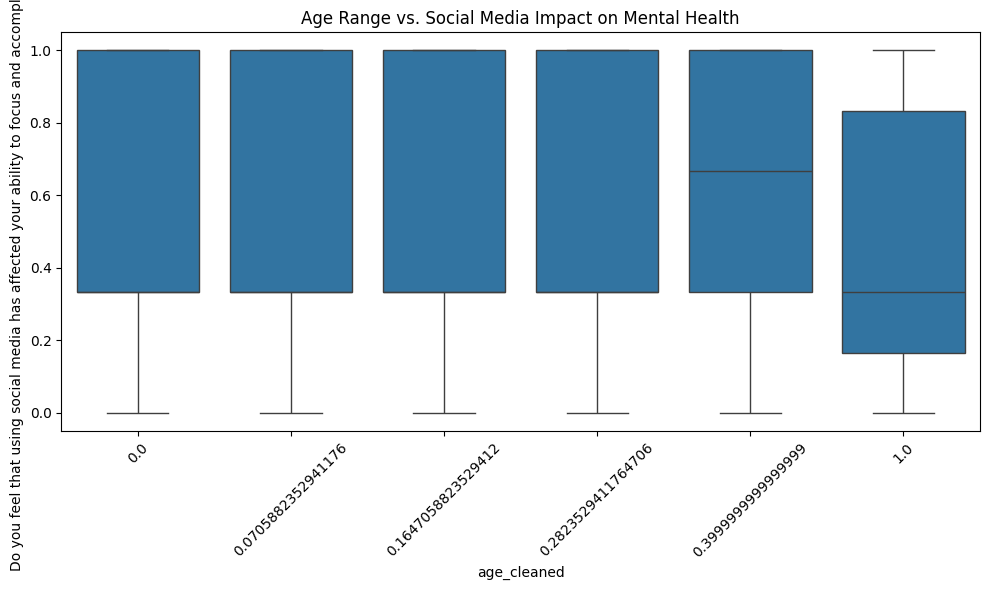

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
surveyData = pd.read_csv('DonePrimary.csv')  # Adjust the file path if needed

# Convert 'the age:' column to numeric
surveyData['age_cleaned'] = pd.to_numeric(surveyData['the age:'], errors='coerce')

# Box plot for age ranges and mental health outcomes
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_cleaned', y='Do you feel that using social media has affected your ability to focus and accomplish daily tasks?', data=surveyData)
plt.title('Age Range vs. Social Media Impact on Mental Health')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


- Younger Age Groups (0-0.283 and 0.283-0.399): These categories show a relatively uniform perception of impact, with median lines close to the middle of the box, indicating a moderate effect of social media on mental health across these age ranges.
- Middle Age Group (0.399-1.0): This group has a wider spread in responses, as evidenced by the taller box, indicating more variability in how social media impacts individuals in this age range. The median is also slightly higher, suggesting a marginally greater perceived impact.
- Oldest Age Group (1.0): This box is notably taller, with the upper whisker extending significantly, indicating that within this group, there are outliers or individuals who feel a disproportionately high impact from social media on their mental health.

### Decision Making:

Throughout our research on the impact of social media on mental health, we made several critical decisions to ensure the study's accuracy and effectiveness. These decisions included consulting psychological experts to validate our survey questions, distributing the survey in Arabic to cater to our Saudi audience, excluding non-social media users due to their small sample size, and converting qualitative responses to a numerical scale for easier comparison with secondary data.

### Challenges:

We encountered various challenges during the survey process, such as questionnaire design, participant fatigue, misunderstanding of questions, and sample diversity. To address these issues, we collaborated with experts, designed a concise questionnaire, provided clear instructions, and utilized multiple social media platforms to reach a broader audience.

### Data Verification and Issues:

After collecting survey responses, we identified several issues during data verification, literal translation challenges. To resolve these problems, we corrected translation inconsistencies to maintain data integrity and accuracy.

Our findings demonstrate the dual nature of social media's impact on mental health. While it can provide social support and connection, it also poses risks such as anxiety and depression. These insights can inform the development of targeted mental health interventions and educational programs to promote responsible social media usage.

